# BIOGENESYS
Empresa farmacéutica busca identificar las ubicaciones óptimas para la expansión de laboratorios farmacéuticos, basándose en el análisis de datos de incidencia de COVID-19, tasas de vacunación, y la disponibilidad de infraestructuras sanitarias.
## Objetivos
1. Realizar un análisis exploratorio de datos sobre la incidencia de COVID-19 y otros factores relevantes, identificando tendencias y oportunidades mediante estadísticas, mediciones y visualizaciones.
2. Aplicar técnicas de limpieza de datos para asegurar la calidad de los datos, facilitando análisis y decisiones estratégicas confiables.
3. Mejorar el acceso a los datos mediante operaciones eficientes de extracción, transformación y carga (ETL), aumentando la eficacia del análisis y la toma de decisiones.
4. Desarrollar dashboards interactivos con visualizaciones eficientes, permitiendo explorar datos desde múltiples perspectivas para una toma de decisiones informada y estratégica. 

## Avance 1

Primero cargamos algunas librerias que necesitaremos paa el analisis de os datos 

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Cargamos la base de datos que los  compañeros de ingeniería de datos han preparado

In [3]:
data=pd.read_csv("data_latinoamerica.csv",sep=",")

A continuacion se muesta las columnas y los datos que contiene el dataset

In [4]:
data

location_key        date country_code country_name  new_confirmed  \
0                  AR  2020-01-01           AR    Argentina            3.0   
1                  AR  2020-01-02           AR    Argentina           14.0   
2                  AR  2020-01-03           AR    Argentina            3.0   
3                  AR  2020-01-04           AR    Argentina            7.0   
4                  AR  2020-01-05           AR    Argentina            5.0   
...               ...         ...          ...          ...            ...   
12216052         VE_Z  2022-09-13           VE    Venezuela            NaN   
12216053         VE_Z  2022-09-14           VE    Venezuela            NaN   
12216054         VE_Z  2022-09-15           VE    Venezuela            NaN   
12216055         VE_Z  2022-09-16           VE    Venezuela            NaN   
12216056         VE_Z  2022-09-17           VE    Venezuela            NaN   

          new_deceased  cumulative_confirmed  cumulative_deceased  \
0                  0.0                   3.0                  0.0   
1                  0.0                  17.0                  0.0   
2                  0.0                  20.0                  0.0   
3                  0.0                  27.0                  0.0   
4                  0.0                  32.0                  0.0   
...                ...                   ...                  ...   
12216052           NaN                   NaN                  NaN   
12216053           NaN                   NaN                  NaN   
12216054           NaN                   NaN                  NaN   
12216055           NaN                   NaN                  NaN   
12216056           NaN                   NaN                  NaN   

          cumulative_vaccine_doses_administered  population  ...  \
0                                           NaN  44938712.0  ...   
1                                           NaN  44938712.0  ...   
2                                           NaN  44938712.0  ...   
3                                           NaN  44938712.0  ...   
4                                           NaN  44938712.0  ...   
...                                         ...         ...  ...   
12216052                                    NaN   1422000.0  ...   
12216053                                    NaN   1422000.0  ...   
12216054                                    NaN   1422000.0  ...   
12216055                                    NaN   1422000.0  ...   
12216056                                    NaN   1422000.0  ...   

          population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0                      15057273.0         2690269.0           55032.0   
1                      15057273.0         2690269.0           55032.0   
2                      15057273.0         2690269.0           55032.0   
3                      15057273.0         2690269.0           55032.0   
4                      15057273.0         2690269.0           55032.0   
...                           ...               ...               ...   
12216052                      NaN               NaN               NaN   
12216053                      NaN               NaN               NaN   
12216054                      NaN               NaN               NaN   
12216055                      NaN               NaN               NaN   
12216056                      NaN               NaN               NaN   

          life_expectancy  adult_male_mortality_rate  \
0                   76.52                    147.086   
1                   76.52                    147.086   
2                   76.52                    147.086   
3                   76.52                    147.086   
4                   76.52                    147.086   
...                   ...                        ...   
12216052              NaN                        NaN   
12216053              NaN                        NaN   
12216054              NaN                    

Utilizamos **np.shape** atributo muy utilizado en Numpy para entender la estructura de los datos.

In [5]:
np.shape(data)

(12216057, 50)

Nos solicitan enfocarnos en 6 paises que se han propuesto por la empresa farmaceutica.
Creamos una lista con los paises seleccionados luego utilizamos el medoto **.isin** de pandas para filtrar los datos.

In [6]:
paises_solicitados=["Argentina","Chile","Colombia","Mexico","Peru","Brazil"]
data_latam=data[data["country_name"].isin(paises_solicitados)]

In [7]:
data_latam.shape

(11970289, 50)

In [8]:
data_latam_fecha=data_latam[data_latam["date"]>"2021-01-01"]

In [9]:
data_latam_fecha

location_key        date country_code country_name  new_confirmed  \
367                AR  2021-01-02           AR    Argentina         7767.0   
368                AR  2021-01-03           AR    Argentina         4934.0   
369                AR  2021-01-04           AR    Argentina        13953.0   
370                AR  2021-01-05           AR    Argentina        14085.0   
371                AR  2021-01-06           AR    Argentina        14496.0   
...               ...         ...          ...          ...            ...   
12136772  PE_UCA_0401  2022-09-13           PE         Peru            NaN   
12136773  PE_UCA_0401  2022-09-14           PE         Peru            NaN   
12136774  PE_UCA_0401  2022-09-15           PE         Peru            NaN   
12136775  PE_UCA_0401  2022-09-16           PE         Peru            NaN   
12136776  PE_UCA_0401  2022-09-17           PE         Peru            NaN   

          new_deceased  cumulative_confirmed  cumulative_deceased  \
367              166.0             1670634.0              46688.0   
368              157.0             1675568.0              46845.0   
369              157.0             1689521.0              47002.0   
370              160.0             1703606.0              47162.0   
371              131.0             1718102.0              47293.0   
...                ...                   ...                  ...   
12136772           NaN                   NaN                  NaN   
12136773           NaN                   NaN                  NaN   
12136774           NaN                   NaN                  NaN   
12136775           NaN                   NaN                  NaN   
12136776           NaN                   NaN                  NaN   

          cumulative_vaccine_doses_administered  population  ...  \
367                                     20334.0  44938712.0  ...   
368                                     20529.0  44938712.0  ...   
369                                     25164.0  44938712.0  ...   
370                                     29852.0  44938712.0  ...   
371                                     34162.0  44938712.0  ...   
...                                         ...         ...  ...   
12136772                                    NaN      2860.0  ...   
12136773                                    NaN      2860.0  ...   
12136774                                    NaN      2860.0  ...   
12136775                                    NaN      2860.0  ...   
12136776                                    NaN      2860.0  ...   

          population_largest_city  area_rural_sq_km  area_urban_sq_km  \
367                    15057273.0         2690269.0           55032.0   
368                    15057273.0         2690269.0           55032.0   
369                    15057273.0         2690269.0           55032.0   
370                    15057273.0         2690269.0           55032.0   
371                    15057273.0         2690269.0           55032.0   
...                           ...               ...               ...   
12136772                      NaN               NaN               NaN   
12136773                      NaN               NaN               NaN   
12136774                      NaN               NaN               NaN   
12136775                      NaN               NaN               NaN   
12136776                      NaN               NaN               NaN   

          life_expectancy  adult_male_mortality_rate  \
367                 76.52                    147.086   
368                 76.52                    147.086   
369                 76.52                    147.086   
370                 76.52                    147.086   
371                 76.52                    147.086   
...                   ...                        ...   
12136772              NaN                        NaN   
12136773              NaN                        NaN   
12136774              NaN                    

In [10]:
data_latam_fecha.isnull().sum()[data_latam_fecha.isnull().sum()>4000000]

cumulative_vaccine_doses_administered    7274069
population_rural                         7533552
population_urban                         7533552
population_density                       7533552
human_development_index                  4075344
gdp_usd                                  7532928
gdp_per_capita_usd                       7532304
smoking_prevalence                       7533552
diabetes_prevalence                      7533552
infant_mortality_rate                    7533552
nurses_per_1000                          7533552
physicians_per_1000                      7533552
population_largest_city                  7533552
area_rural_sq_km                         7533552
area_urban_sq_km                         7533552
life_expectancy                          7533552
adult_male_mortality_rate                7533552
adult_female_mortality_rate              7533552
pollution_mortality_rate                 7533552
comorbidity_mortality_rate               7533552
new_recovered       

In [11]:
data_latam_fecha.location_key.value_counts()

location_key
AR              624
MX_GRO_12040    624
MX_GRO_12031    624
MX_GRO_12032    624
MX_GRO_12033    624
               ... 
BR_PR_411880    624
BR_PR_411885    624
BR_PR_411890    624
BR_PR_411900    624
PE_UCA_0401     624
Name: count, Length: 12079, dtype: int64

In [12]:
data_latam_paises=data_latam_fecha[data_latam_fecha["location_key"].isin(["AR","CL","CO","MX","PE","BR"])]
data_latam_fecha.shape

(7537296, 50)

In [13]:
data_latam_paises.shape

(3744, 50)

In [14]:
valores_nulos_fecha =data_latam_paises.isnull().sum()[data_latam_paises.isnull().sum()>0]
print(valores_nulos_fecha)
print(np.shape(data_latam_paises))

new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
average_temperature_celsius                42
minimum_temperature_celsius                41
maximum_temperature_celsius                41
rainfall_mm                                90
relative_humidity                          42
new_recovered                            2116
cumulative_recovered                     2736
dtype: int64
(3744, 50)


In [15]:
columnas_especificas = [
    'new_confirmed', 'new_deceased', 
    'average_temperature_celsius', 'minimum_temperature_celsius', 'maximum_temperature_celsius',
    'rainfall_mm', 'relative_humidity'
]


In [16]:
for pais in paises_solicitados:
    # Filtrar los datos por país
    df_pais = data_latam_paises[data_latam_paises['country_name'] == pais]

    
    # Iterar sobre cada columna
    for col in columnas_especificas:
        # Reemplazar valores nulos con el promedio de la columna para ese país
        if df_pais[col].isnull().sum() > 0:  # Verificar si hay valores nulos
            mean_value = df_pais[col].mean()
            data_latam_paises.loc[data_latam_paises['country_name'] == pais, col] = data_latam_paises.loc[data_latam_paises['country_name'] == pais, col].fillna(mean_value)



In [17]:
print(data_latam_paises.isnull().sum()[data_latam_paises.isnull().sum()>0])
print(np.shape(data_latam_paises))


cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
new_recovered                            2116
cumulative_recovered                     2736
dtype: int64
(3744, 50)


In [19]:
###
#data_latam_paises['cumulative_vaccine_doses_administered']=data_latam_paises['cumulative_vaccine_doses_administered'].fillna(0)
data_latam_paises['new_recovered']=data_latam_paises['new_recovered'].fillna(0)


#data_latam_paises['cumulative_recovered']=data_latam_paises['cumulative_recovered'].fillna(0)

 

    

C:\Users\paque\AppData\Local\Temp\ipykernel_2444\4054807337.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latam_paises['new_recovered']=data_latam_paises['new_recovered'].fillna(0)


In [20]:
print(data_latam_paises.isnull().sum()[data_latam_paises.isnull().sum()>0])
print(np.shape(data_latam_paises))

cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
cumulative_recovered                     2736
dtype: int64
(3744, 50)


In [21]:

# Lista de columnas a procesar
columnas_cumulative = [
    'cumulative_confirmed', 
    'cumulative_deceased', 
    "cumulative_vaccine_doses_administered",
    "cumulative_recovered",
]

# Iterar sobre cada país seleccionado
for pais in paises_solicitados:
    # Filtrar los datos por país
    mask = data_latam_paises['country_name'] == pais
    
    # Reemplazar valores nulos en cada columna especificada con el valor anterior (forward fill)
    for col in columnas_cumulative:
        data_latam_paises.loc[mask, col] = data_latam_paises.loc[mask, col].fillna(method='ffill')

C:\Users\paque\AppData\Local\Temp\ipykernel_2444\2184675492.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_latam_paises.loc[mask, col] = data_latam_paises.loc[mask, col].fillna(method='ffill')
C:\Users\paque\AppData\Local\Temp\ipykernel_2444\2184675492.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_latam_paises.loc[mask, col] = data_latam_paises.loc[mask, col].fillna(method='ffill')
C:\Users\paque\AppData\Local\Temp\ipykernel_2444\2184675492.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_latam_paises.loc[mask, col] = data_latam_paises.loc[mask, col].fillna(method='ffill')
C:\Users\paque\AppData\Local\Temp\ipykernel_2444\2184675492.py:16: FutureWarning: Series.fillna with 'method' is deprecat

In [22]:
print(data_latam_paises.isnull().sum()[data_latam_paises.isnull().sum()>0])
print(np.shape(data_latam_paises))

cumulative_vaccine_doses_administered     103
cumulative_recovered                     2496
dtype: int64
(3744, 50)


In [23]:
data_latam_paises['cumulative_recovered']=data_latam_paises['cumulative_recovered'].fillna(0)
data_latam_paises['cumulative_vaccine_doses_administered']=data_latam_paises['cumulative_vaccine_doses_administered'].fillna(0)

C:\Users\paque\AppData\Local\Temp\ipykernel_2444\3736114773.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latam_paises['cumulative_recovered']=data_latam_paises['cumulative_recovered'].fillna(0)
C:\Users\paque\AppData\Local\Temp\ipykernel_2444\3736114773.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latam_paises['cumulative_vaccine_doses_administered']=data_latam_paises['cumulative_vaccine_doses_administered'].fillna(0)


In [24]:
print(data_latam_paises.isnull().sum()[data_latam_paises.isnull().sum()>0])
print(np.shape(data_latam_paises))

Series([], dtype: int64)
(3744, 50)


In [25]:
data_latam_paises.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3744 entries, 367 to 10253876
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   location_key                           3744 non-null   object 
 1   date                                   3744 non-null   object 
 2   country_code                           3744 non-null   object 
 3   country_name                           3744 non-null   object 
 4   new_confirmed                          3744 non-null   float64
 5   new_deceased                           3744 non-null   float64
 6   cumulative_confirmed                   3744 non-null   float64
 7   cumulative_deceased                    3744 non-null   float64
 8   cumulative_vaccine_doses_administered  3744 non-null   float64
 9   population                             3744 non-null   float64
 10  population_male                        3744 non-null   float64
 11  pop

In [26]:
columnas_float_a_int = ['new_confirmed', 'new_deceased', 'cumulative_confirmed',
       'cumulative_deceased', 'cumulative_vaccine_doses_administered','population',                             
       'population_male','population_female','population_urban','population_age_00_09',                   
       'population_age_10_19','population_age_20_29','population_age_30_39','population_age_40_49',                  
       'population_age_50_59','population_age_60_69','population_age_70_79','population_age_80_and_older',
       'gdp_per_capita_usd','area_sq_km','population_largest_city','area_rural_sq_km',                      
       'area_urban_sq_km','new_recovered','cumulative_recovered']
    
# Iterar sobre cada columna
for columna in columnas_float_a_int:

        data_latam_paises[columna] = data_latam_paises[columna].astype(int)

data_latam_paises.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3744 entries, 367 to 10253876
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   location_key                           3744 non-null   object 
 1   date                                   3744 non-null   object 
 2   country_code                           3744 non-null   object 
 3   country_name                           3744 non-null   object 
 4   new_confirmed                          3744 non-null   int32  
 5   new_deceased                           3744 non-null   int32  
 6   cumulative_confirmed                   3744 non-null   int32  
 7   cumulative_deceased                    3744 non-null   int32  
 8   cumulative_vaccine_doses_administered  3744 non-null   int32  
 9   population                             3744 non-null   int32  
 10  population_male                        3744 non-null   int32  
 11  pop

C:\Users\paque\AppData\Local\Temp\ipykernel_2444\3013805678.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latam_paises[columna] = data_latam_paises[columna].astype(int)
C:\Users\paque\AppData\Local\Temp\ipykernel_2444\3013805678.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latam_paises[columna] = data_latam_paises[columna].astype(int)
C:\Users\paque\AppData\Local\Temp\ipykernel_2444\3013805678.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [27]:
data_latam_paises.to_csv("datosfinalesfiltrados.csv",index=False)

### Base de datos filtrada

In [28]:
data_latam_paises=pd.read_csv("datosfinalesfiltrados.csv", sep=",")

In [29]:
data_latam_paises.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3744 entries, 0 to 3743
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   location_key                           3744 non-null   object 
 1   date                                   3744 non-null   object 
 2   country_code                           3744 non-null   object 
 3   country_name                           3744 non-null   object 
 4   new_confirmed                          3744 non-null   int64  
 5   new_deceased                           3744 non-null   int64  
 6   cumulative_confirmed                   3744 non-null   int64  
 7   cumulative_deceased                    3744 non-null   int64  
 8   cumulative_vaccine_doses_administered  3744 non-null   int64  
 9   population                             3744 non-null   int64  
 10  population_male                        3744 non-null   int64  
 11  popu

In [30]:
data_latam_paises.describe()

new_confirmed  new_deceased  cumulative_confirmed  cumulative_deceased  \
count    3744.000000   3744.000000          3.744000e+03          3744.000000   
mean    13921.906784    276.885417          6.793569e+06        193024.770299   
std     24219.361428    507.240047          8.005067e+06        182997.039494   
min      -573.000000      0.000000          9.710000e+02             1.000000   
25%      1536.750000     26.000000          2.132216e+06         59293.000000   
50%      5214.000000    100.500000          3.643377e+06        139628.500000   
75%     14834.000000    312.000000          6.247634e+06        215171.500000   
max    298408.000000  11447.000000          3.456883e+07        685203.000000   

       cumulative_vaccine_doses_administered    population  population_male  \
count                           3.744000e+03  3.744000e+03     3.744000e+03   
mean                            8.082799e+07  7.772147e+07     3.787035e+07   
std                             9.354879e+07  6.713776e+07     3.318494e+07   
min                             0.000000e+00  1.757400e+07     8.972014e+06   
25%                             1.618311e+07  2.938188e+07     1.445076e+07   
50%                             4.778491e+07  4.791080e+07     2.225416e+07   
75%                             9.443991e+07  1.109920e+08     5.485523e+07   
max                             3.478685e+08  2.125594e+08     1.044358e+08   

       population_female  population_rural  population_urban  ...  \
count       3.744000e+03      3.744000e+03      3.744000e+03  ...   
mean        3.927162e+07      1.255498e+07      6.833931e+07  ...   
std         3.448407e+07      1.008074e+07      5.829529e+07  ...   
min         8.601989e+06      2.341903e+06      1.661014e+07  ...   
25%         1.493113e+07      3.599141e+06      2.539034e+07  ...   
50%         2.324582e+07      8.316128e+06      4.108344e+07  ...   
75%         5.748131e+07      2.494867e+07      1.026269e+08  ...   
max         1.081236e+08      2.780789e+07      1.832416e+08  ...   

       population_largest_city  area_rural_sq_km  area_urban_sq_km  \
count             3.744000e+03      3.744000e+03       3744.000000   
mean              1.443888e+07      2.636580e+06      59502.500000   
std               5.710077e+06      2.584740e+06      45125.320206   
min               6.723516e+06      7.094180e+05      12027.000000   
25%               1.055471e+07      1.090598e+06      16425.000000   
50%               1.291832e+07      1.543881e+06      45582.000000   
75%               2.167191e+07      2.690269e+06     102418.000000   
max               2.184651e+07      8.241430e+06     134981.000000   

       life_expectancy  adult_male_mortality_rate  \
count      3744.000000                3744.000000   
mean         76.808500                 154.274667   
std           1.597394                  27.000146   
min          74.992000                 107.669000   
25%          75.672000                 146.370000   
50%          76.518000                 149.351000   
75%          77.109000                 184.379000   
max          80.042000                 188.528000   

       adult_female_mortality_rate  pollution_mortality_rate  \
count                  3744.000000               3744.000000   
mean                     81.428000                 36.566667   
std                      11.800623                 13.027569   
min                      59.035000                 25.300000   
25%                      77.999000                 26.600000   
50%                      82.149000                 33.300000   
75%                      91.421000                 37.000000   
max                      95.815000                 63.900000   

       comorbidity_mortality_rate  new_recovered  cumulative_recovered  
count                 3744.000000    3744.000000          3.744000e+03  
mean                    14.816667    8263.612179          4.265799e+06  
std                      1.665972   23

In [32]:
data_latam_paises['new_confirmed'] = data_latam_paises['new_confirmed'].abs()
data_latam_paises['new_recovered'] = data_latam_paises['new_recovered'].abs()


In [33]:
data_latam_paises.describe()

new_confirmed  new_deceased  cumulative_confirmed  cumulative_deceased  \
count    3744.000000   3744.000000          3.744000e+03          3744.000000   
mean    13922.212874    276.885417          6.793569e+06        193024.770299   
std     24219.185430    507.240047          8.005067e+06        182997.039494   
min         0.000000      0.000000          9.710000e+02             1.000000   
25%      1536.750000     26.000000          2.132216e+06         59293.000000   
50%      5214.000000    100.500000          3.643377e+06        139628.500000   
75%     14834.000000    312.000000          6.247634e+06        215171.500000   
max    298408.000000  11447.000000          3.456883e+07        685203.000000   

       cumulative_vaccine_doses_administered    population  population_male  \
count                           3.744000e+03  3.744000e+03     3.744000e+03   
mean                            8.082799e+07  7.772147e+07     3.787035e+07   
std                             9.354879e+07  6.713776e+07     3.318494e+07   
min                             0.000000e+00  1.757400e+07     8.972014e+06   
25%                             1.618311e+07  2.938188e+07     1.445076e+07   
50%                             4.778491e+07  4.791080e+07     2.225416e+07   
75%                             9.443991e+07  1.109920e+08     5.485523e+07   
max                             3.478685e+08  2.125594e+08     1.044358e+08   

       population_female  population_rural  population_urban  ...  \
count       3.744000e+03      3.744000e+03      3.744000e+03  ...   
mean        3.927162e+07      1.255498e+07      6.833931e+07  ...   
std         3.448407e+07      1.008074e+07      5.829529e+07  ...   
min         8.601989e+06      2.341903e+06      1.661014e+07  ...   
25%         1.493113e+07      3.599141e+06      2.539034e+07  ...   
50%         2.324582e+07      8.316128e+06      4.108344e+07  ...   
75%         5.748131e+07      2.494867e+07      1.026269e+08  ...   
max         1.081236e+08      2.780789e+07      1.832416e+08  ...   

       population_largest_city  area_rural_sq_km  area_urban_sq_km  \
count             3.744000e+03      3.744000e+03       3744.000000   
mean              1.443888e+07      2.636580e+06      59502.500000   
std               5.710077e+06      2.584740e+06      45125.320206   
min               6.723516e+06      7.094180e+05      12027.000000   
25%               1.055471e+07      1.090598e+06      16425.000000   
50%               1.291832e+07      1.543881e+06      45582.000000   
75%               2.167191e+07      2.690269e+06     102418.000000   
max               2.184651e+07      8.241430e+06     134981.000000   

       life_expectancy  adult_male_mortality_rate  \
count      3744.000000                3744.000000   
mean         76.808500                 154.274667   
std           1.597394                  27.000146   
min          74.992000                 107.669000   
25%          75.672000                 146.370000   
50%          76.518000                 149.351000   
75%          77.109000                 184.379000   
max          80.042000                 188.528000   

       adult_female_mortality_rate  pollution_mortality_rate  \
count                  3744.000000               3744.000000   
mean                     81.428000                 36.566667   
std                      11.800623                 13.027569   
min                      59.035000                 25.300000   
25%                      77.999000                 26.600000   
50%                      82.149000                 33.300000   
75%                      91.421000                 37.000000   
max                      95.815000                 63.900000   

       comorbidity_mortality_rate  new_recovered  cumulative_recovered  
count                 3744.000000    3744.000000          3.744000e+03  
mean                    14.816667    8348.282585          4.265799e+06  
std                      1.665972   23

In [34]:
for i in data_latam_paises.columns:
    print(i)
    print(data_latam_paises[i].describe())
    print("____________________")

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
____________________
date
count           3744
unique           624
top       2021-01-02
freq               6
Name: date, dtype: object
____________________
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
____________________
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
____________________
new_confirmed
count      3744.000000
mean      13922.212874
std       24219.185430
min           0.000000
25%        1536.750000
50%        5214.000000
75%       14834.000000
max      298408.000000
Name: new_confirmed, dtype: float64
____________________
new_deceased
count     3744.000000
mean       276.885417
std        507.240047
min          0.000000
25%         26.000000
50%        100.500000
75%        312.000000
max      11447.000000
Name: new_deceas

In [35]:
def Analisis_datos(data):
    for i in data.columns:
        if data[i].dtype=="float64" or data[i].dtype=="int64":
            print(i)
            print("Mediana:", data[i].median())
            print("Moda:",data[i].mode())
            print("Varianza:", data[i].var())
            print("Rango:",data[i].max()-data[i].min())
            print("____________________")

Analisis_datos(data_latam_paises)


new_confirmed
Mediana: 5214.0
Moda: 0    0
Name: new_confirmed, dtype: int64
Varianza: 586568942.8921559
Rango: 298408
____________________
new_deceased
Mediana: 100.5
Moda: 0    0
Name: new_deceased, dtype: int64
Varianza: 257292.46482600857
Rango: 11447
____________________
cumulative_confirmed
Mediana: 3643377.0
Moda: 0    6304317
Name: cumulative_confirmed, dtype: int64
Varianza: 64081091330927.14
Rango: 34567862
____________________
cumulative_deceased
Mediana: 139628.5
Moda: 0    141708
Name: cumulative_deceased, dtype: int64
Varianza: 33487916463.656017
Rango: 685202
____________________
cumulative_vaccine_doses_administered
Mediana: 47784908.0
Moda: 0    0
Name: cumulative_vaccine_doses_administered, dtype: int64
Varianza: 8751375229164421.0
Rango: 347868481
____________________
population
Mediana: 47910798.0
Moda: 0     17574003
1     29381884
2     44938712
3     50882884
4    110991953
5    212559409
Name: population, dtype: int64
Varianza: 4507478439615793.0
Rango: 19498540

## Avance 2

In [36]:
for i in data_latam_paises.columns:
    print(i)
    print(data_latam_paises[i].describe())
    print("_________________")

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
_________________
date
count           3744
unique           624
top       2021-01-02
freq               6
Name: date, dtype: object
_________________
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
_________________
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
_________________
new_confirmed
count      3744.000000
mean      13922.212874
std       24219.185430
min           0.000000
25%        1536.750000
50%        5214.000000
75%       14834.000000
max      298408.000000
Name: new_confirmed, dtype: float64
_________________
new_deceased
count     3744.000000
mean       276.885417
std        507.240047
min          0.000000
25%         26.000000
50%        100.500000
75%        312.000000
max      11447.000000
Name: new_deceased, dtype: floa

In [37]:
data_latam_paises['date']=pd.to_datetime(data_latam_paises['date'])
data_latam_paises.set_index('date', inplace = True)

### Matriz de correlación

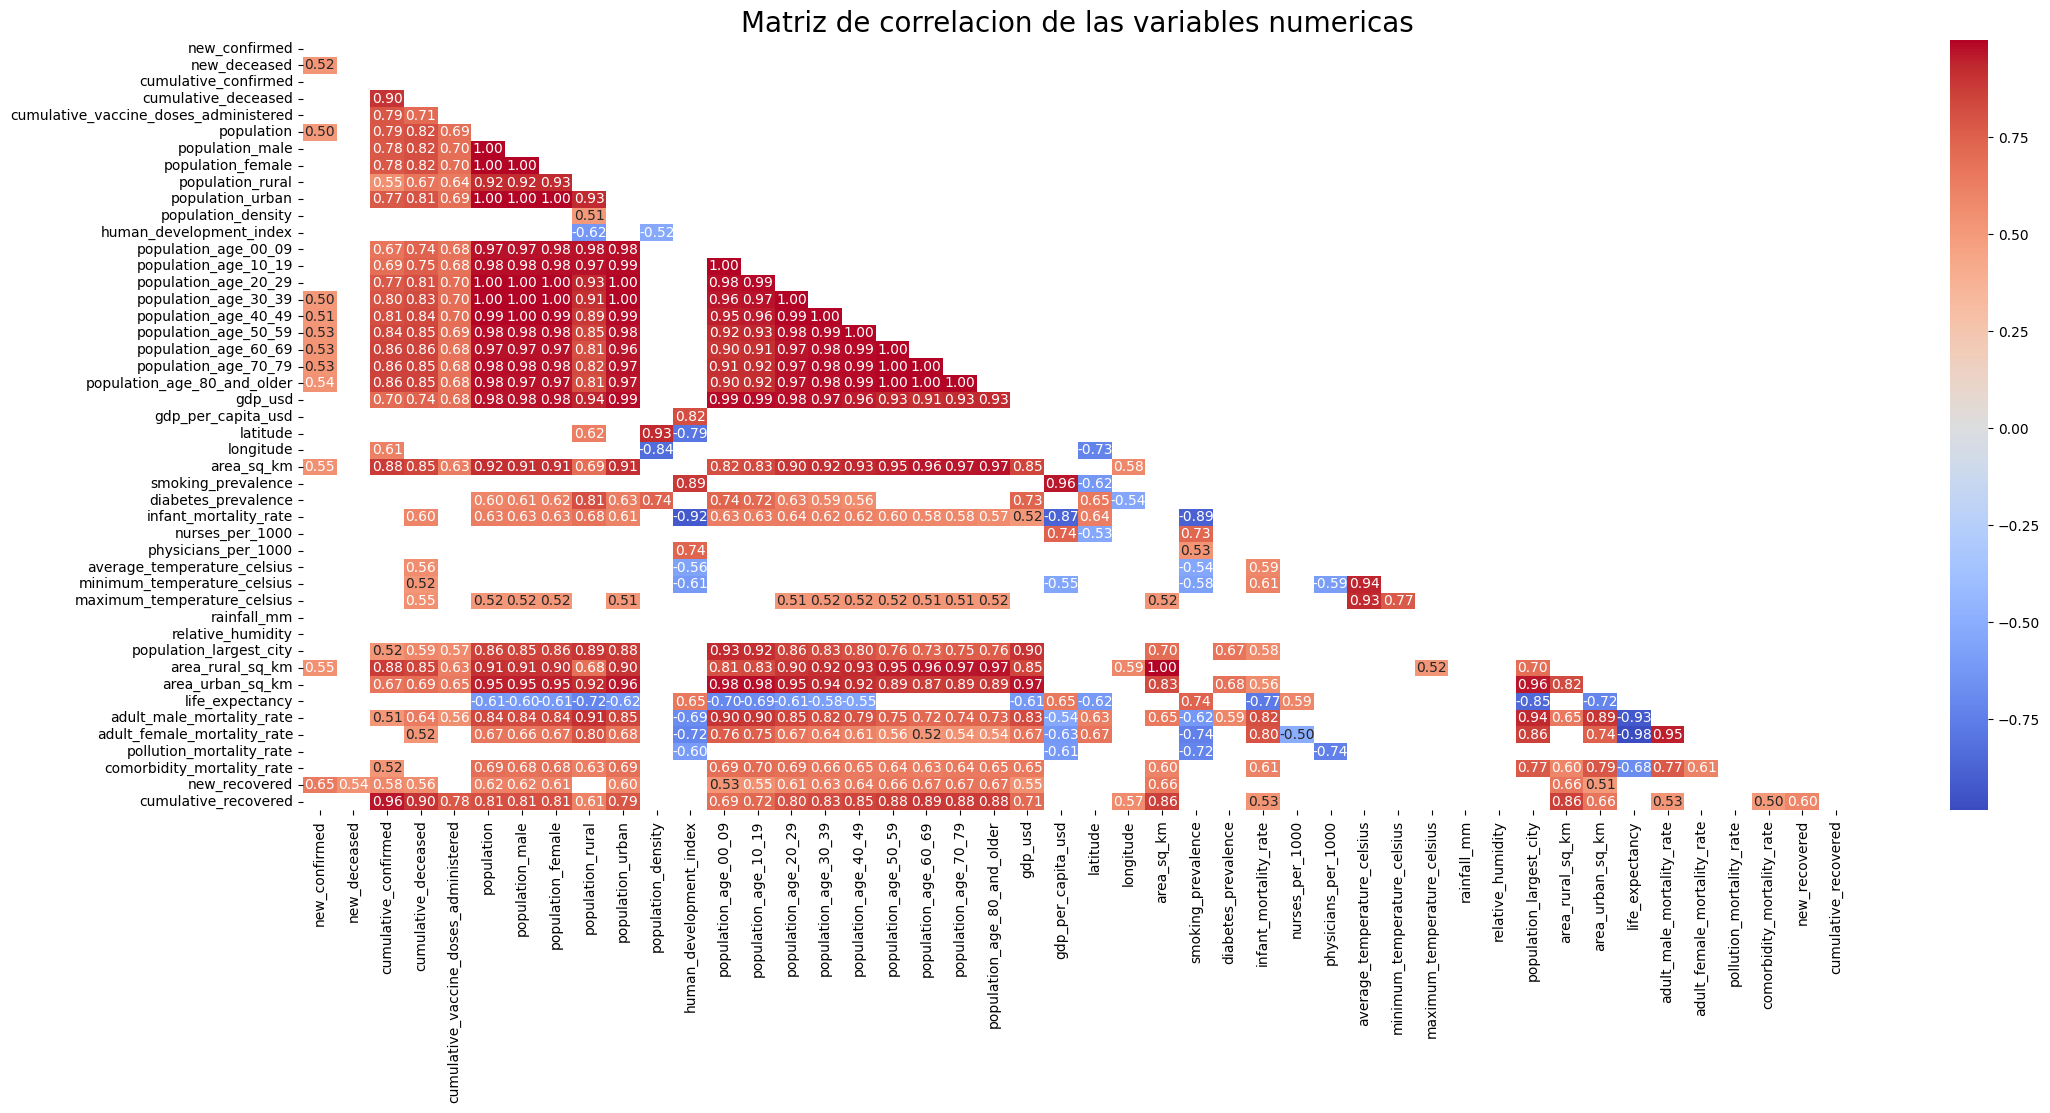

In [38]:
numeric_columns = data_latam_paises.select_dtypes(include=["float64", "int64"]).columns
correlacio_matrix=data_latam_paises[numeric_columns].corr()
### se crea mascara para triangulo superior
mask= np.triu(np.ones_like(correlacio_matrix,dtype=bool))
### valores superiores a 0.5 donde hay una correlacion fuerte
correlacio_matrix=correlacio_matrix[abs(correlacio_matrix)>abs(0.5)]
##Graficamod
plt.figure(figsize=(25,10))
heatmap=sns.heatmap(correlacio_matrix,mask=mask,annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Matriz de correlacion de las variables numericas",fontsize=20)
plt.show()




En la gráfica anterior se presentan Las variables con mayor correlación, para identificarlas más rápido, se definió un umbral cuyo valor absoluto sea mayor a 0.5 y se graficaron en un heatmap.
Ya teniendo una idea de las variables que tienen mayor correlación, podría hacer un análisis más detallado de estas variables esto se podría hacer en un análisis posterior y una toma de decisiones para la creación de un modelo ML.


### Graficas de algunas variables 

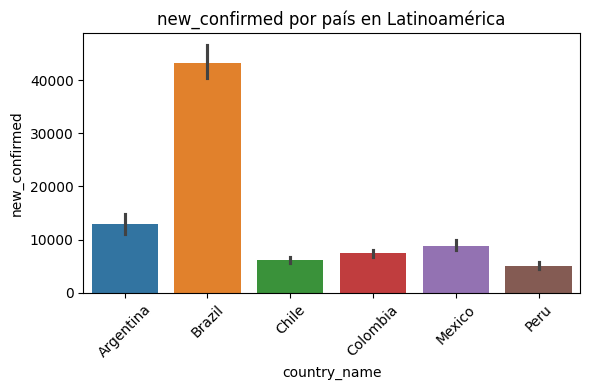

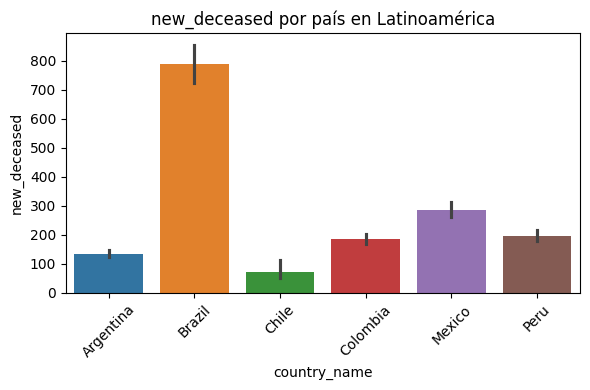

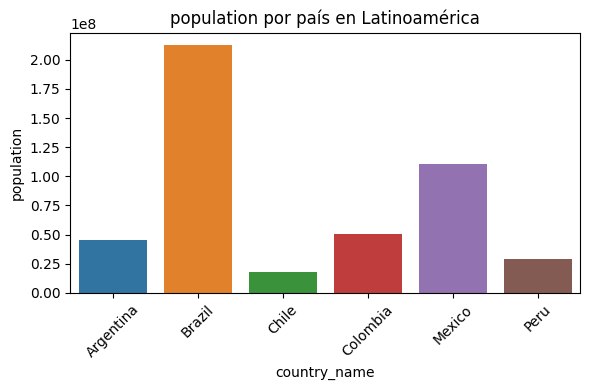

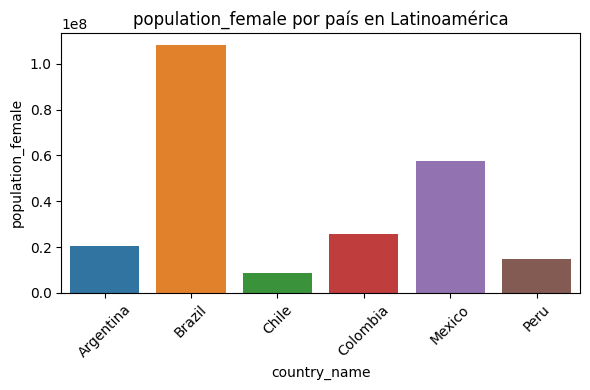

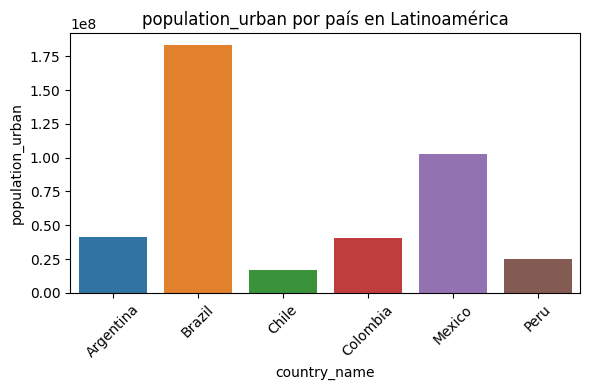

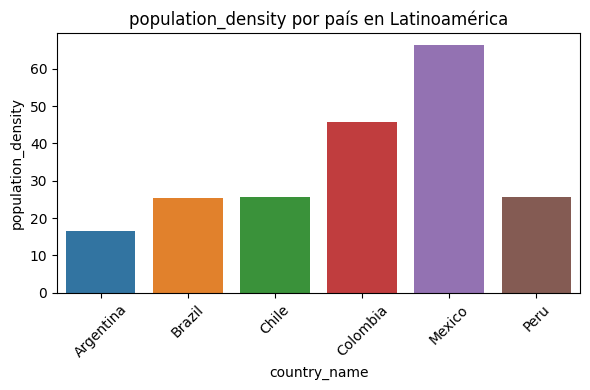

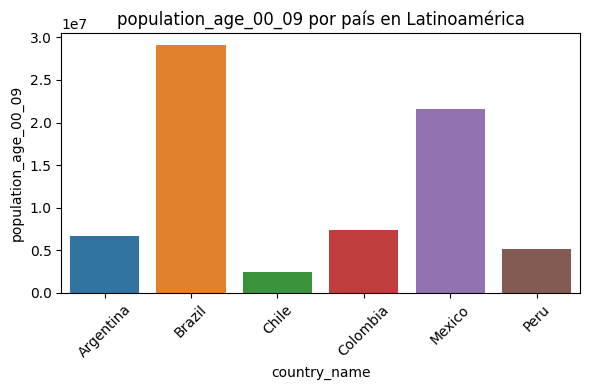

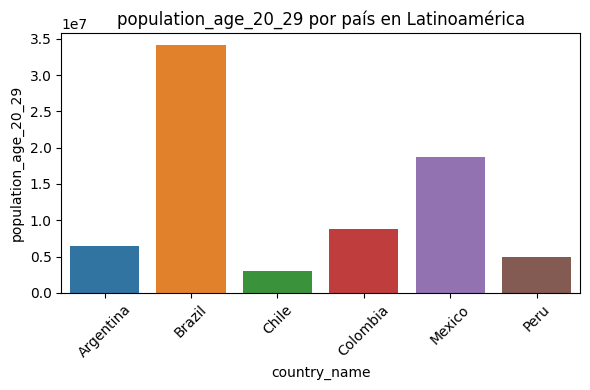

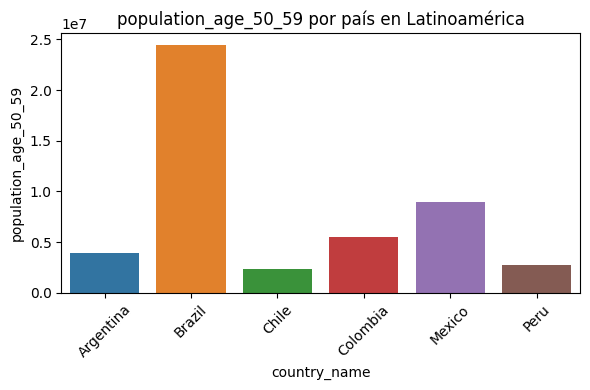

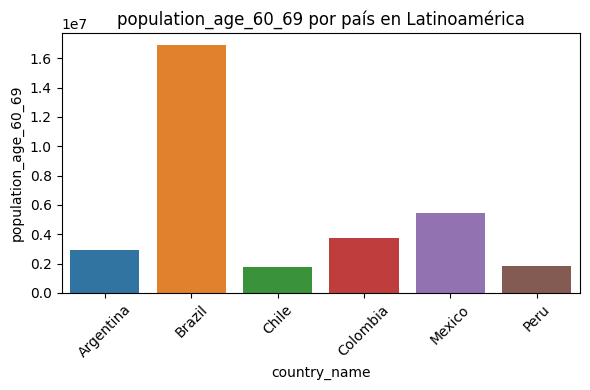

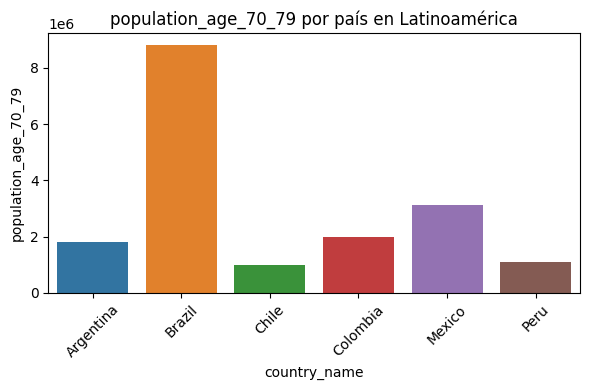

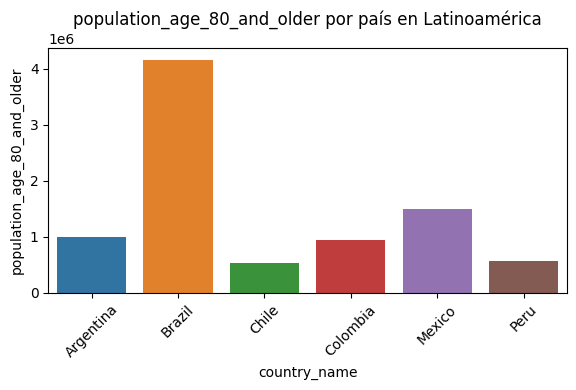

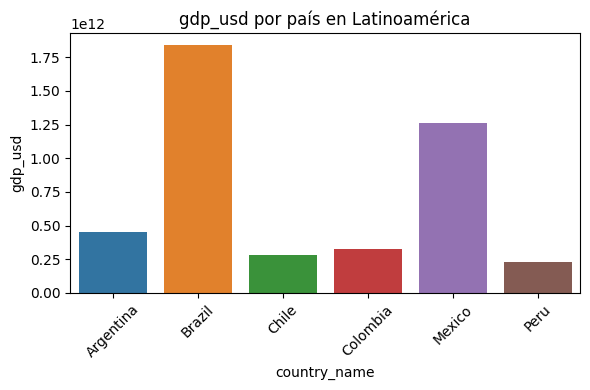

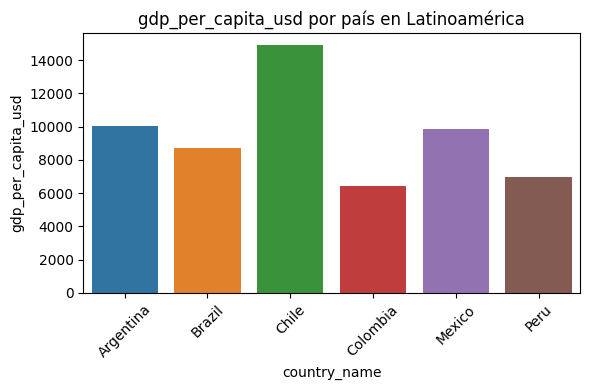

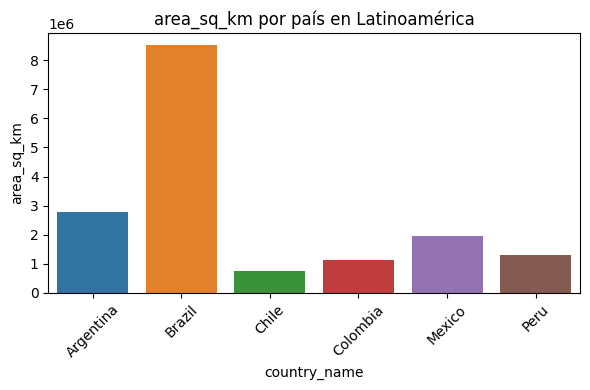

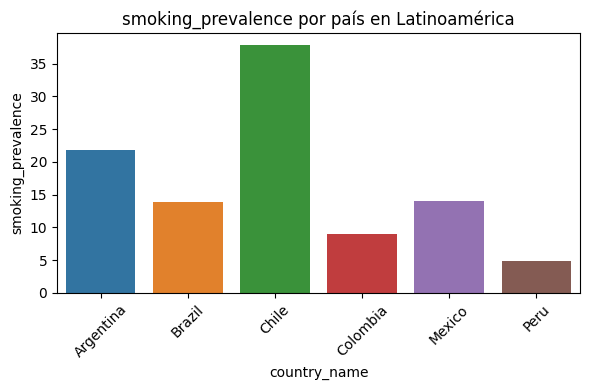

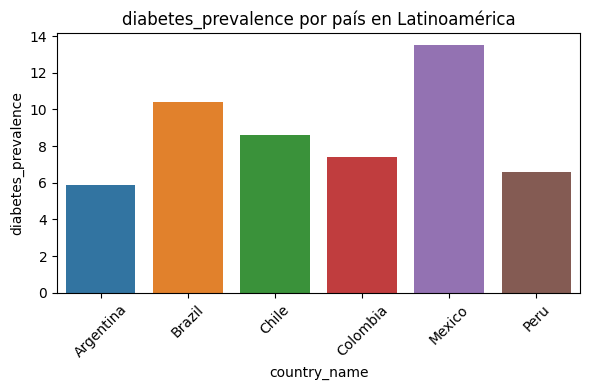

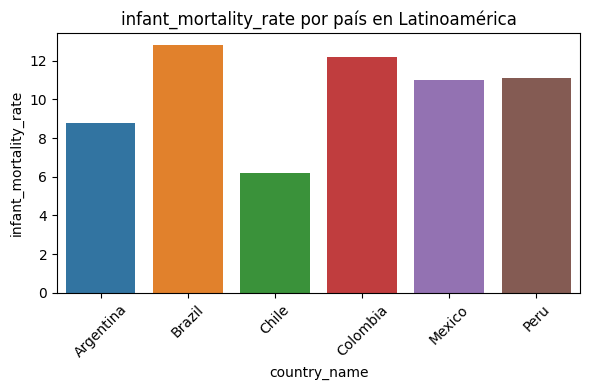

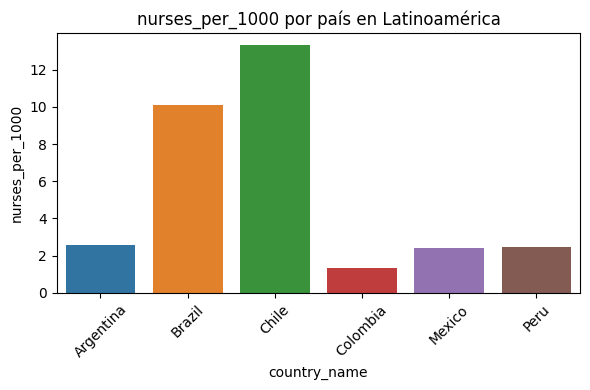

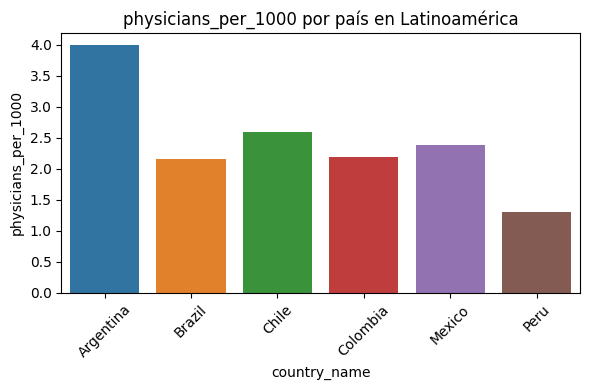

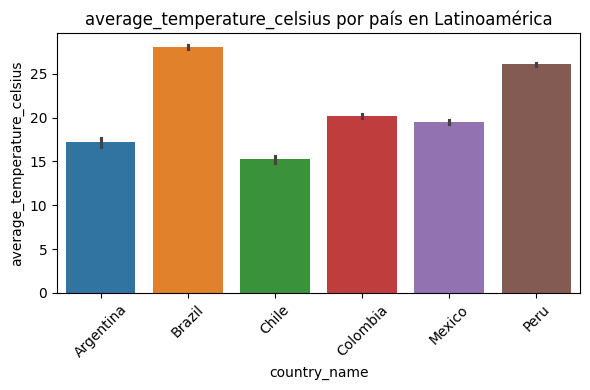

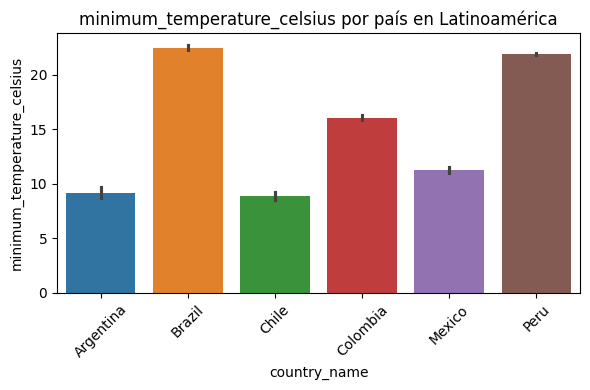

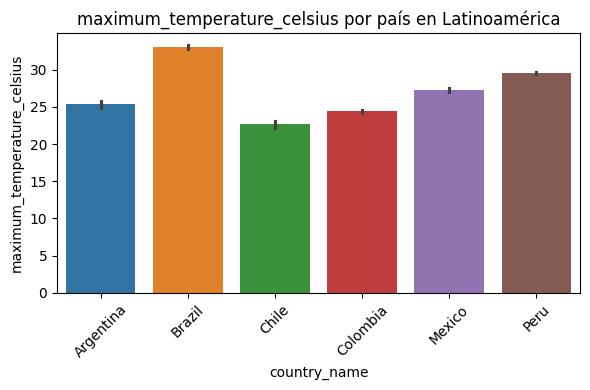

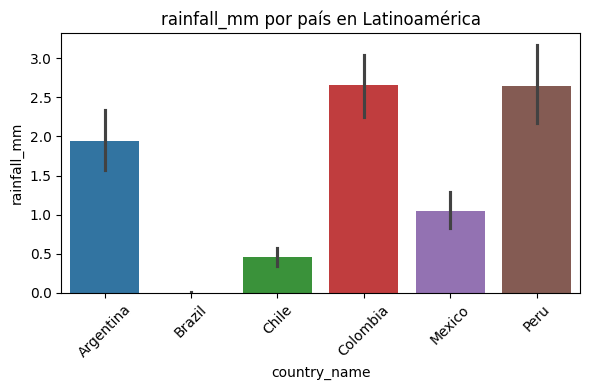

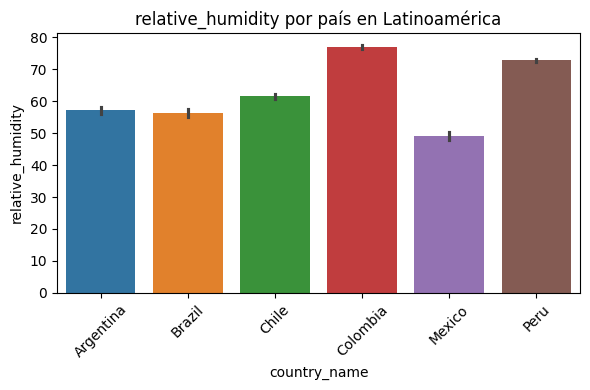

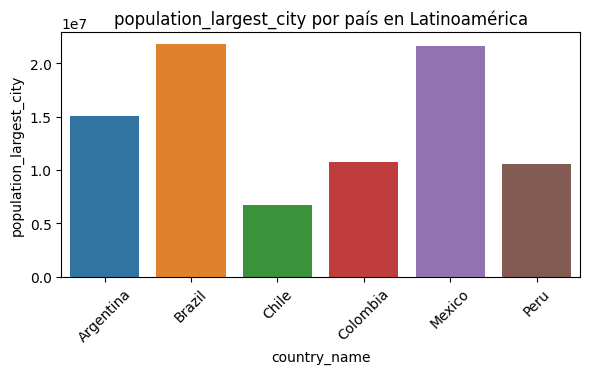

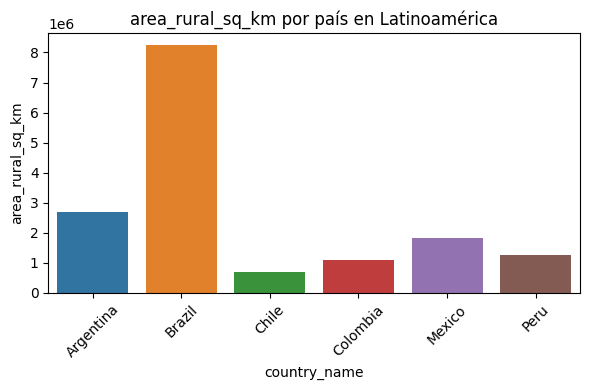

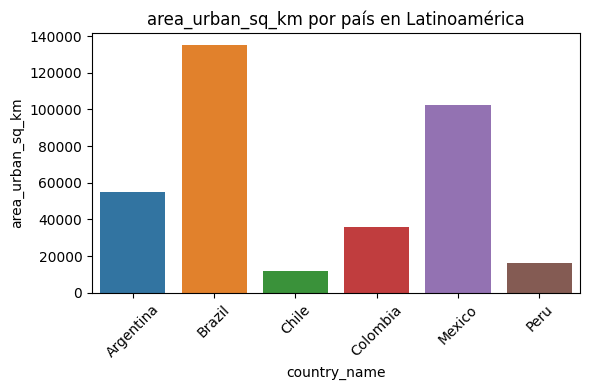

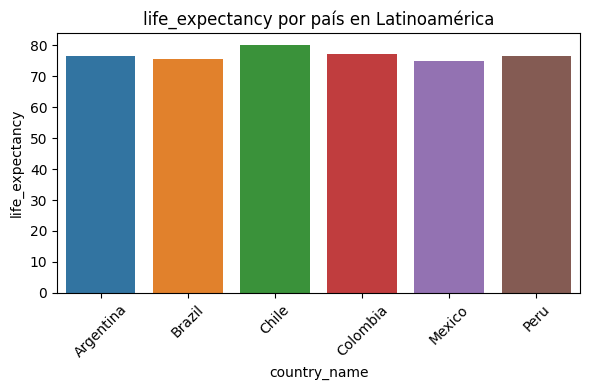

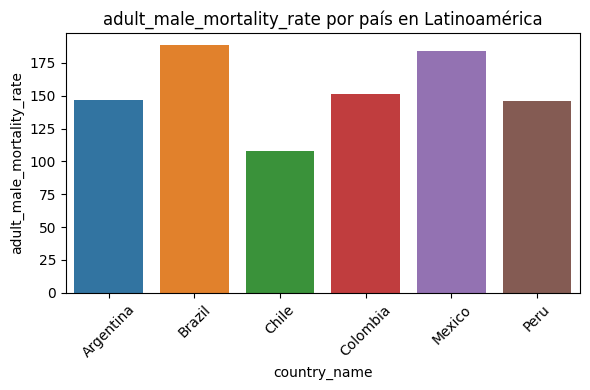

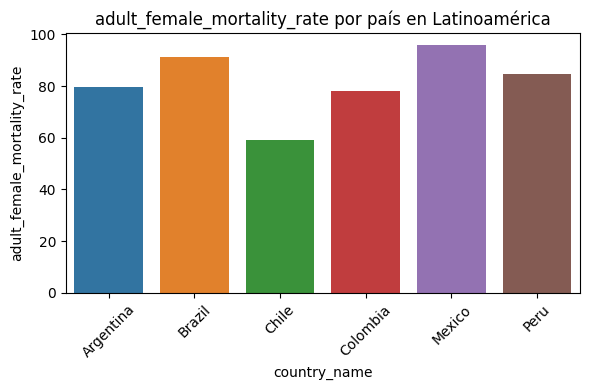

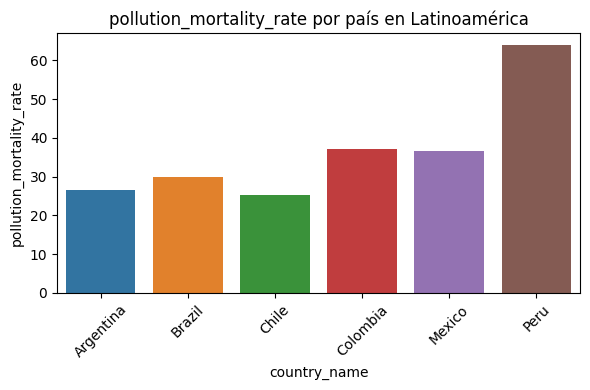

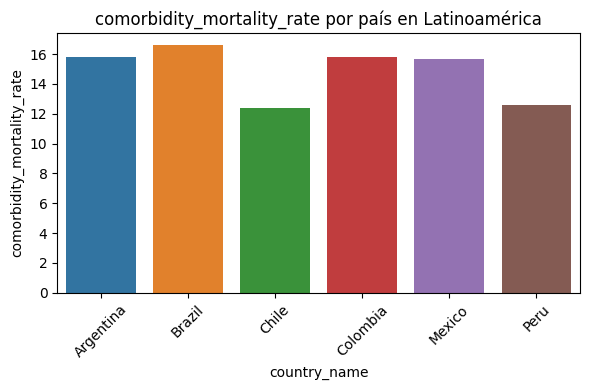

In [39]:
for i in data_latam_paises.columns:
    if i not in  ["location_key","date","country_code","country_name","longitude", "latitude","cumulative_confirmed","cumulative_deceased",
               "cumulative_recovered","cumulative_vaccine_doses_administered","new_recovered"]:
                fig, ax = plt.subplots(figsize=(6, 4)) 
                sns.barplot(x='country_name', y=i, data=data_latam_paises, ax=ax, hue='country_name')
                ax.set_title(f'{i} por país en Latinoamérica')
                plt.xticks(rotation=45)  
                plt.tight_layout()  
                plt.show()

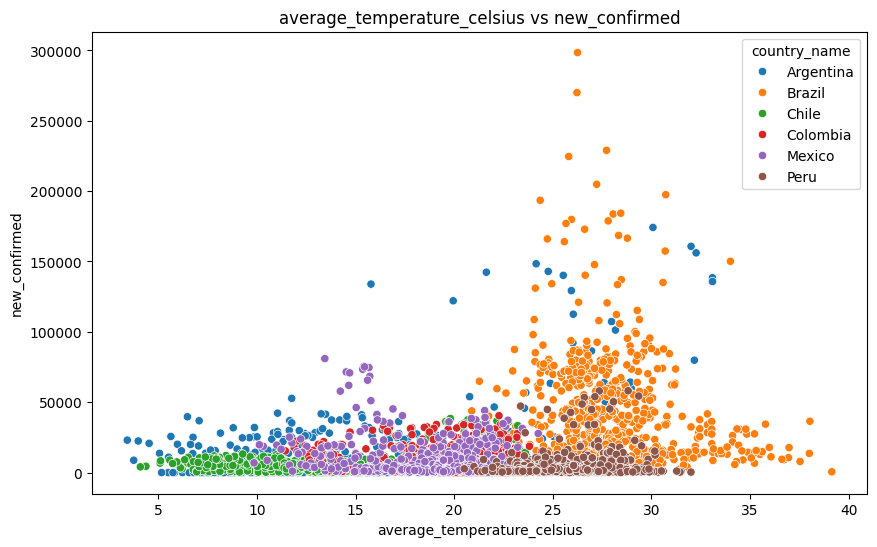

In [40]:
## grafica de average_temperatura_celsiud vs new_confirmed
fig,ax =plt.subplots(figsize=(10,6))
sns.scatterplot(x="average_temperature_celsius", y= "new_confirmed", data = data_latam_paises, hue="country_name")
plt.title("average_temperature_celsius vs new_confirmed")
plt.show()


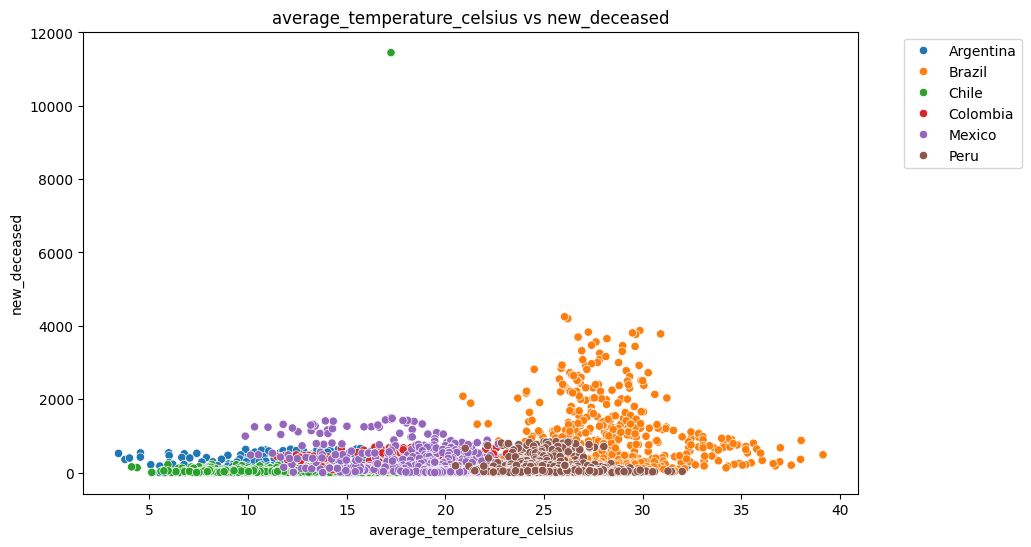

In [41]:
## grafica de average_temperature_celsius vs new_deceased
fig,ax =plt.subplots(figsize=(10,6))
sns.scatterplot(x="average_temperature_celsius", y= "new_deceased", data = data_latam_paises, hue="country_name")
plt.title("average_temperature_celsius vs new_deceased")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.show()


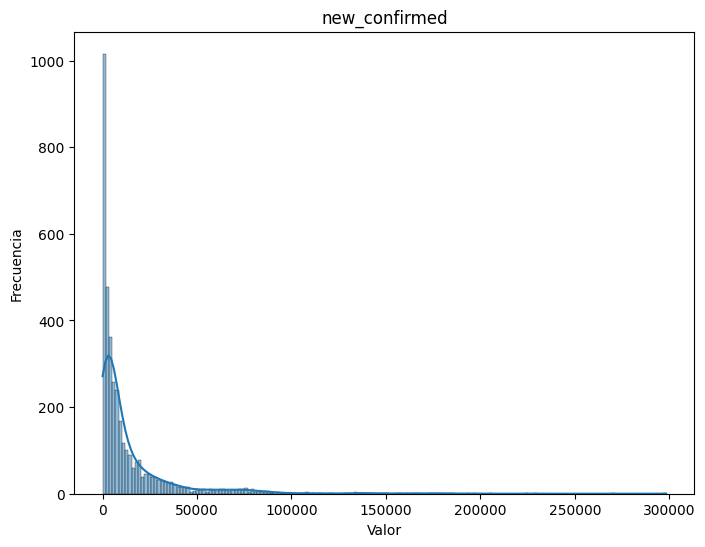

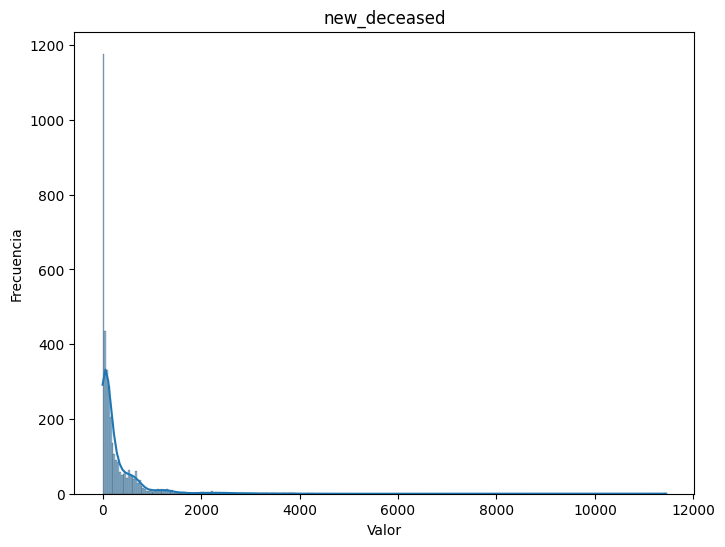

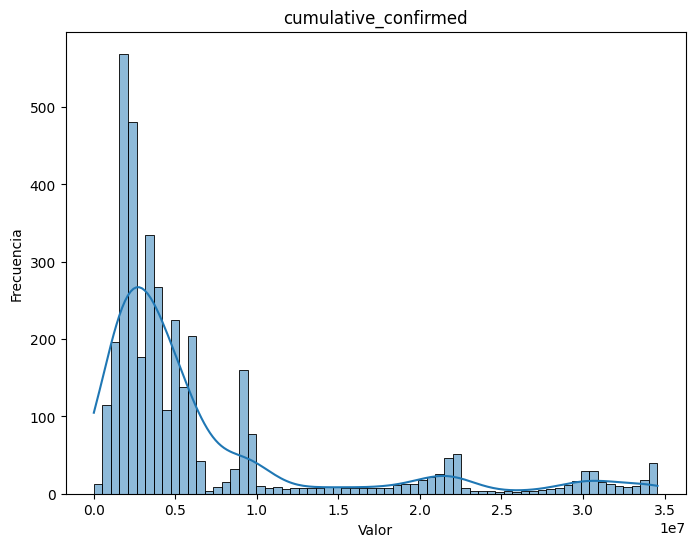

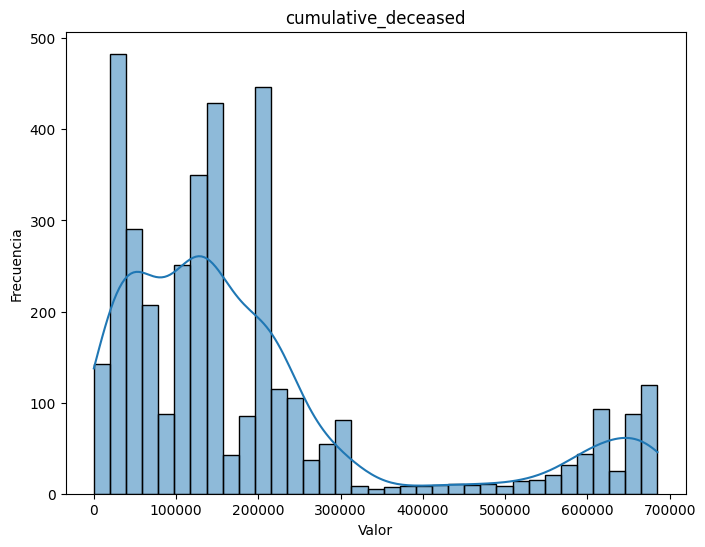

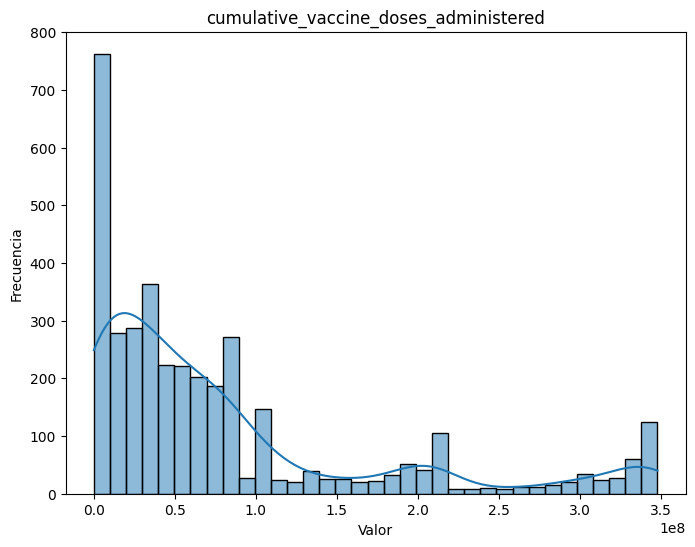

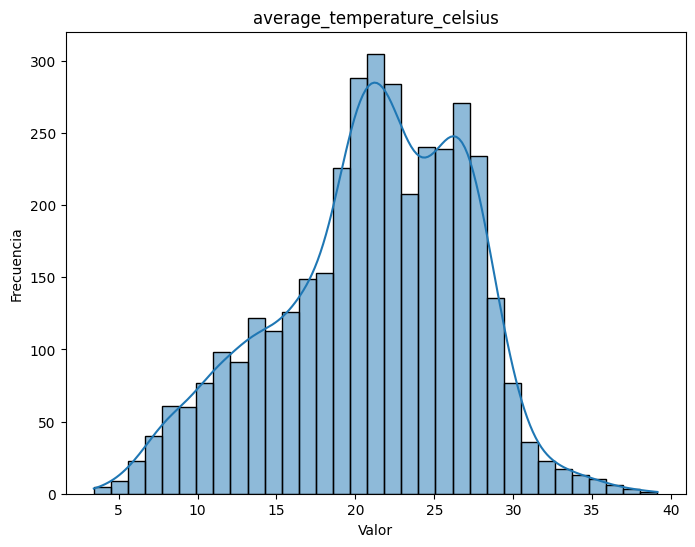

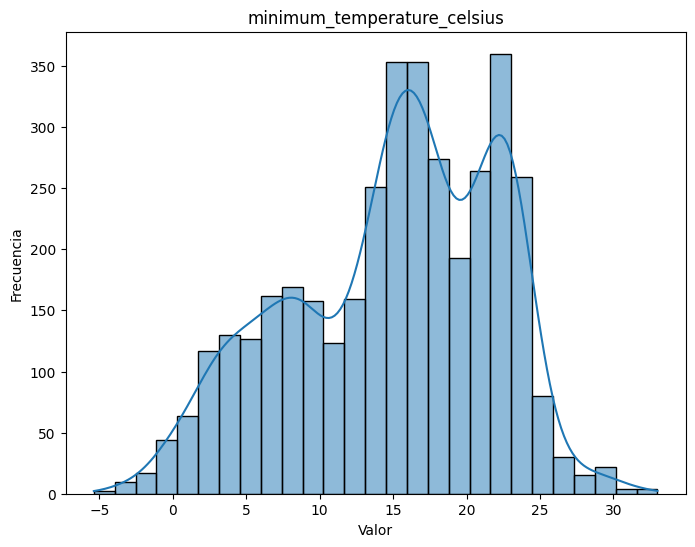

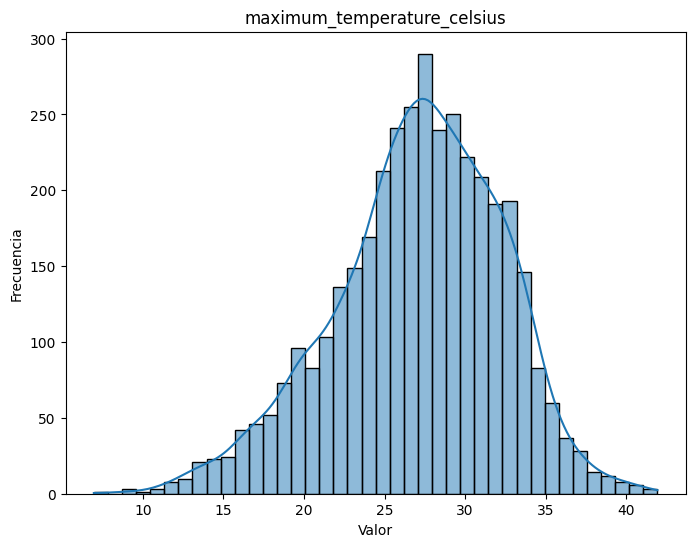

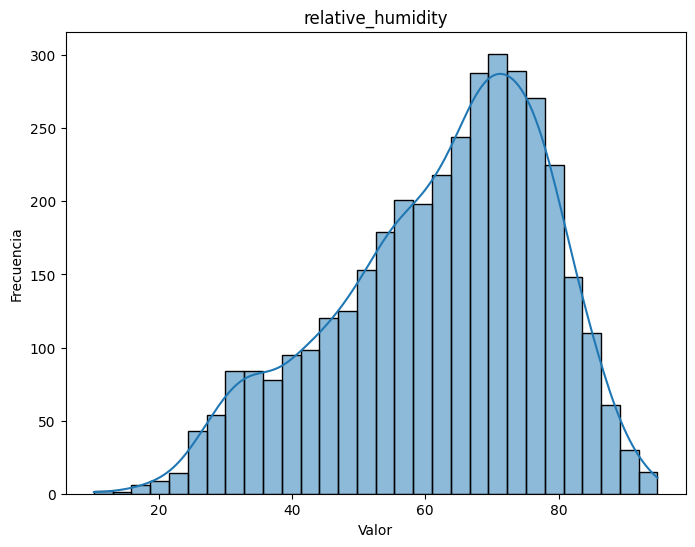

In [42]:


# Identificar las variables que tienen cambios de valores
lista_de_columnas=["new_confirmed","new_deceased","cumulative_confirmed","cumulative_deceased",
                   "cumulative_vaccine_doses_administered","average_temperature_celsius","minimum_temperature_celsius",
                   "maximum_temperature_celsius","relative_humidity"]


# Trazar histogramas para estas variables
for i in data_latam_paises[lista_de_columnas]:
    plt.figure(figsize=(8, 6))
    sns.histplot(data_latam_paises[i], kde=True)  # Puedes ajustar los bins según tu preferencia
    plt.title(i)
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')
    plt.show()


## Grafica evolucion de dosis administradas por pais.

In [43]:
paises_solicitados=["Argentina","Chile","Colombia","Mexico","Peru","Brazil"]

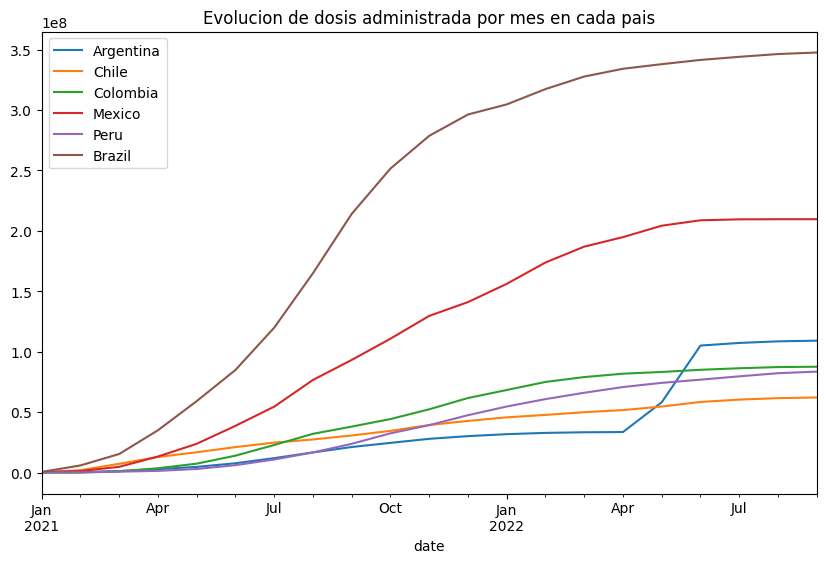

In [44]:
fig, ax = plt.subplots(figsize=(10,6))
for pais in paises_solicitados:
    data_latam_paises[data_latam_paises["country_name"]== pais].resample("ME").mean(numeric_only=True)["cumulative_vaccine_doses_administered"].plot()
plt.title("Evolucion de dosis administrada por mes en cada pais")
plt.legend(bbox_to_anchor=(1.05,1),loc="upper left") 
plt.legend(paises_solicitados)
plt.show()   

## Grafica muertes por mes de cada pais 


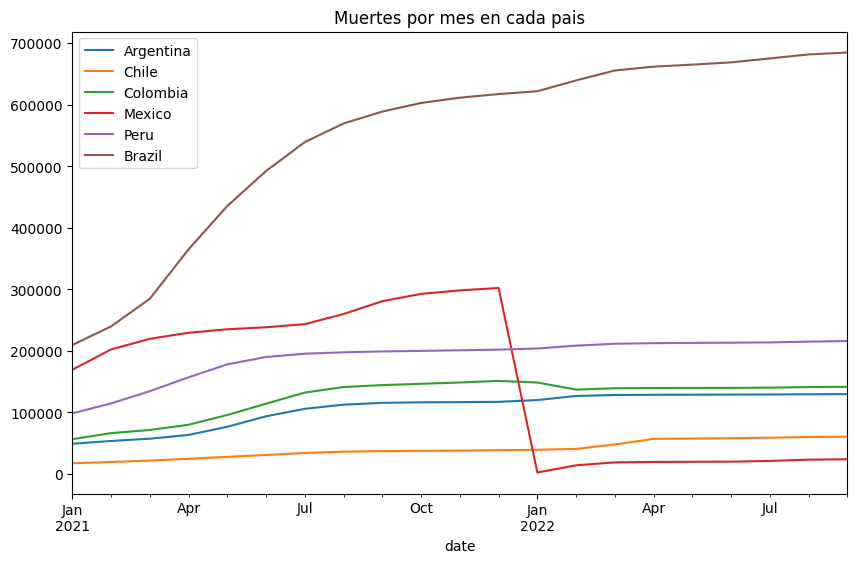

In [45]:
fig, ax = plt.subplots(figsize=(10,6))
for pais in paises_solicitados:
    data_latam_paises[data_latam_paises["country_name"]== pais].resample("ME").mean(numeric_only=True)["cumulative_deceased"].plot()
plt.title("Muertes por mes en cada pais")
plt.legend(bbox_to_anchor=(1.05,1),loc="upper left") 
plt.legend(paises_solicitados)
plt.show()   

## Casos confirmados por mes 

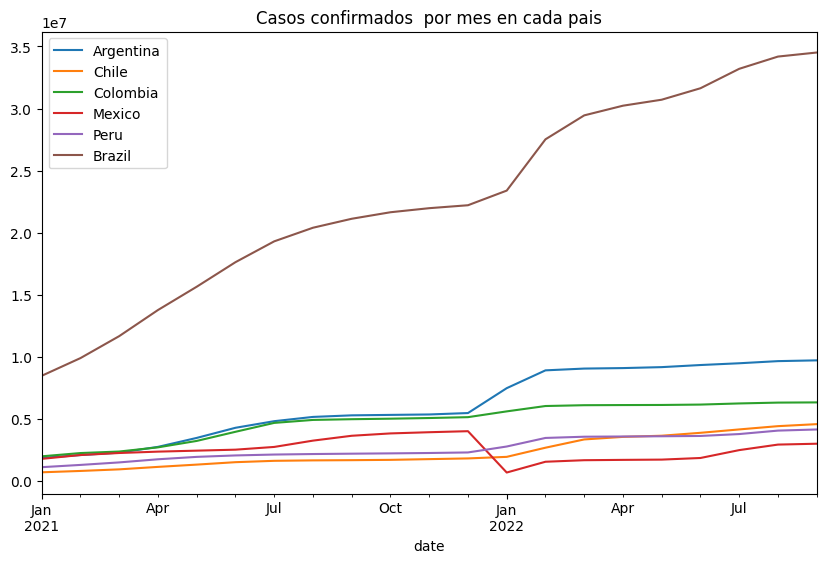

In [46]:
fig, ax = plt.subplots(figsize=(10,6))
for pais in paises_solicitados:
    data_latam_paises[data_latam_paises["country_name"]== pais].resample("ME").mean(numeric_only=True)["cumulative_confirmed"].plot()
plt.title("Casos confirmados  por mes en cada pais")
plt.legend(bbox_to_anchor=(1.05,1),loc="upper left") 
plt.legend(paises_solicitados)
plt.show()   

##  Nuevos casos confirmados en cada pais 

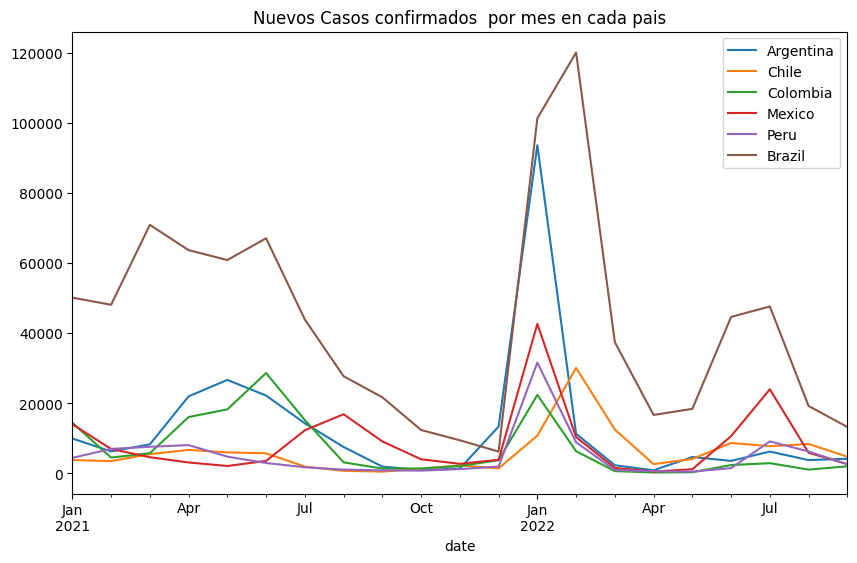

In [47]:
fig, ax = plt.subplots(figsize=(10,6))
for pais in paises_solicitados:
    data_latam_paises[data_latam_paises["country_name"]== pais].resample("ME").mean(numeric_only=True)["new_confirmed"].plot()
plt.title("Nuevos Casos confirmados  por mes en cada pais")
plt.legend(bbox_to_anchor=(1.05,1),loc="upper left") 
plt.legend(paises_solicitados)
plt.show()   

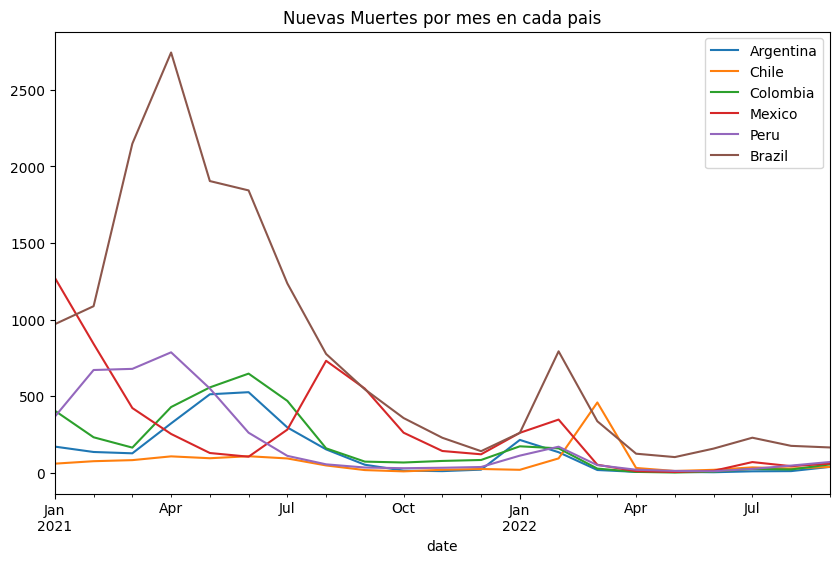

In [48]:
fig, ax = plt.subplots(figsize=(10,6))
for pais in paises_solicitados:
    data_latam_paises[data_latam_paises["country_name"]== pais].resample("ME").mean(numeric_only=True)["new_deceased"].plot()
plt.title("Nuevas Muertes por mes en cada pais")
plt.legend(bbox_to_anchor=(1.05,1),loc="upper left") 
plt.legend(paises_solicitados)
plt.show()   

Text(0.5, 1.0, 'Distribucion de dosis acumuladas por pais ')

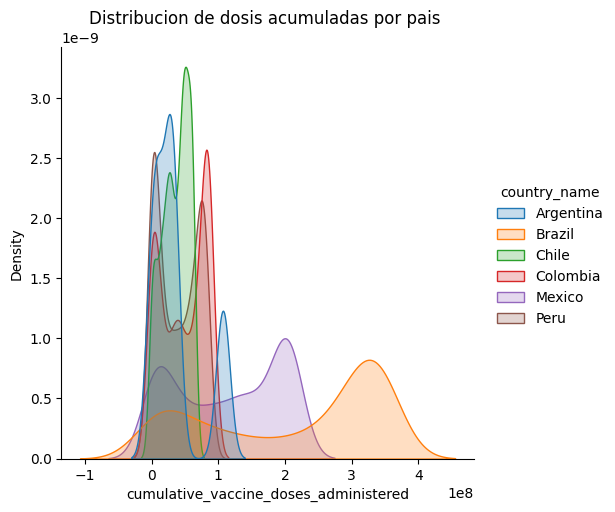

In [49]:
sns.displot(data_latam_paises, x= "cumulative_vaccine_doses_administered", hue="country_name", kind="kde", fill= True)
plt.title("Distribucion de dosis acumuladas por pais ")

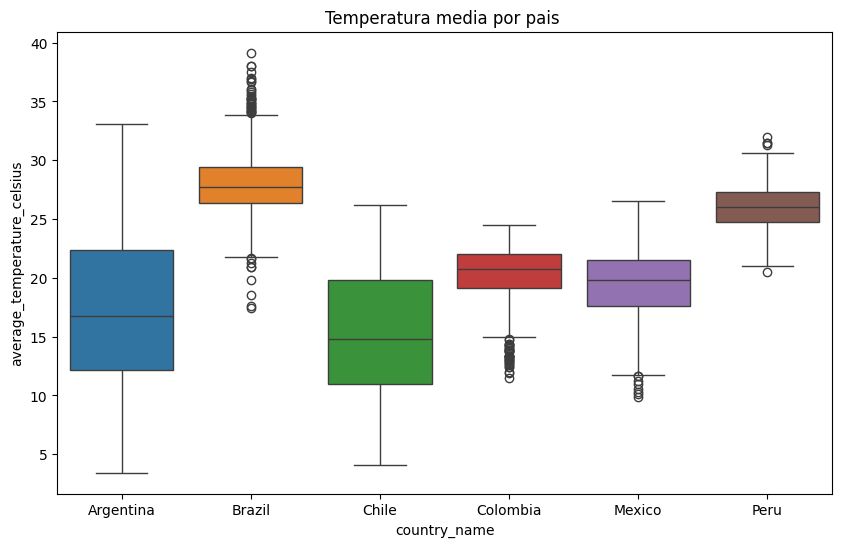

In [50]:
fig,ax=plt.subplots(figsize=(10,6))
sns.boxplot(x="country_name", y= "average_temperature_celsius", data= data_latam_paises, hue = "country_name")
plt.title("Temperatura media por pais ")
plt.show()


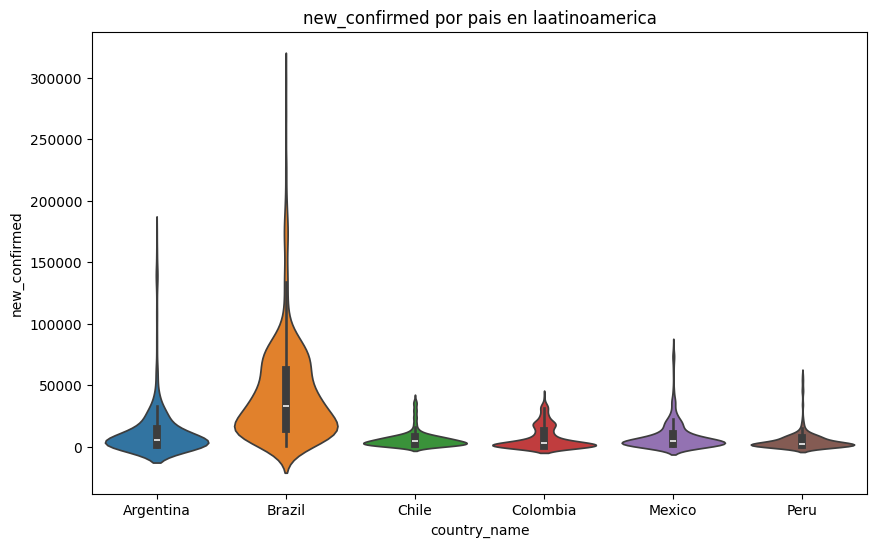

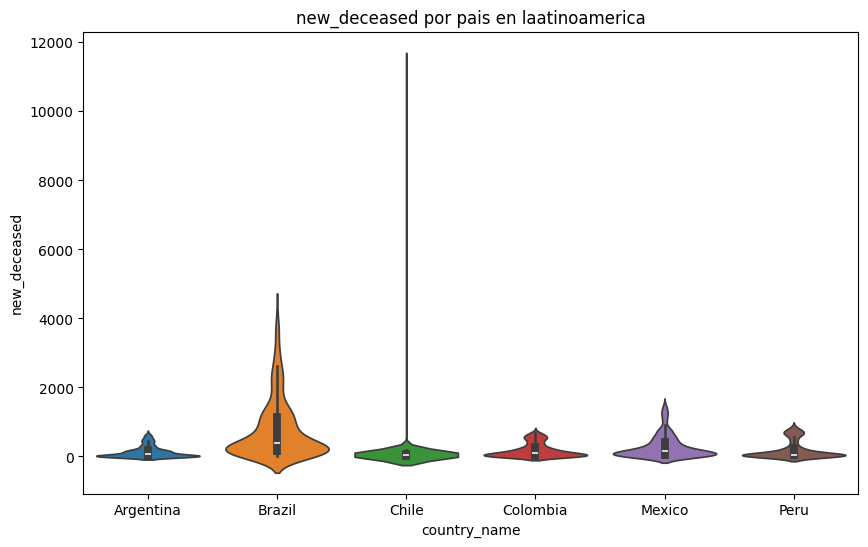

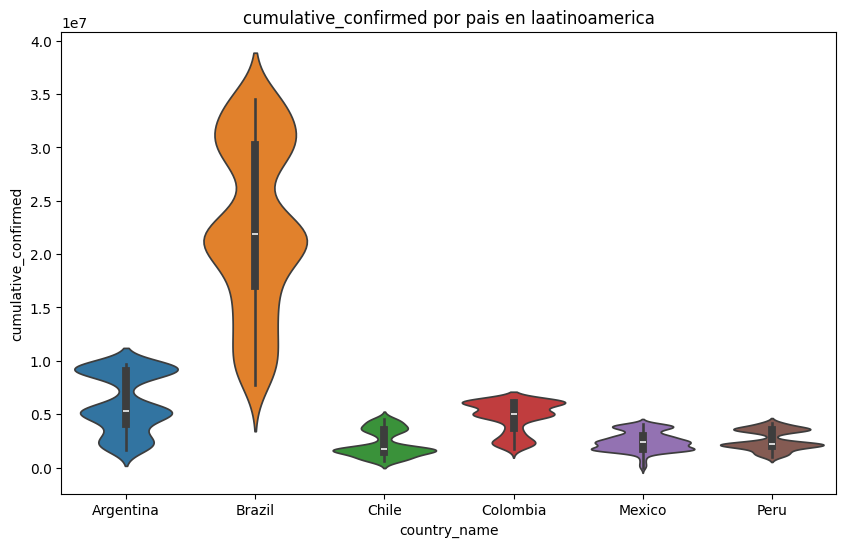

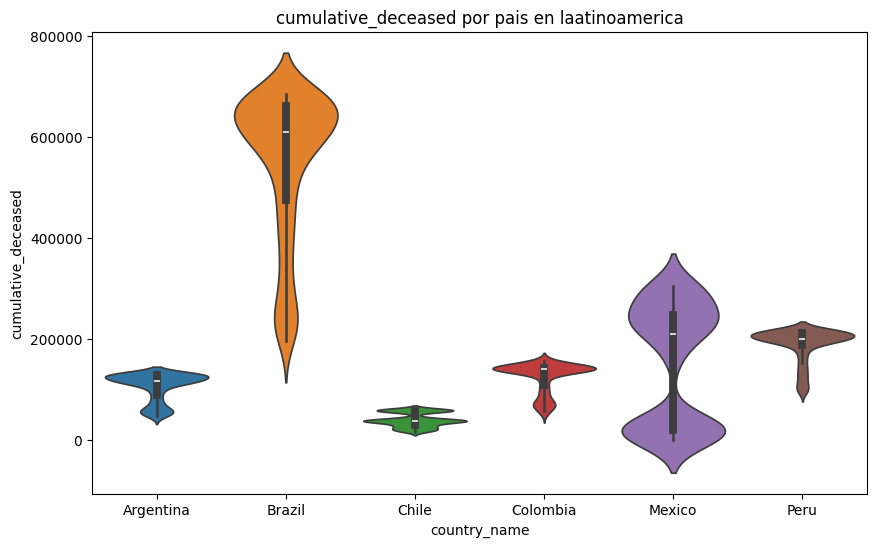

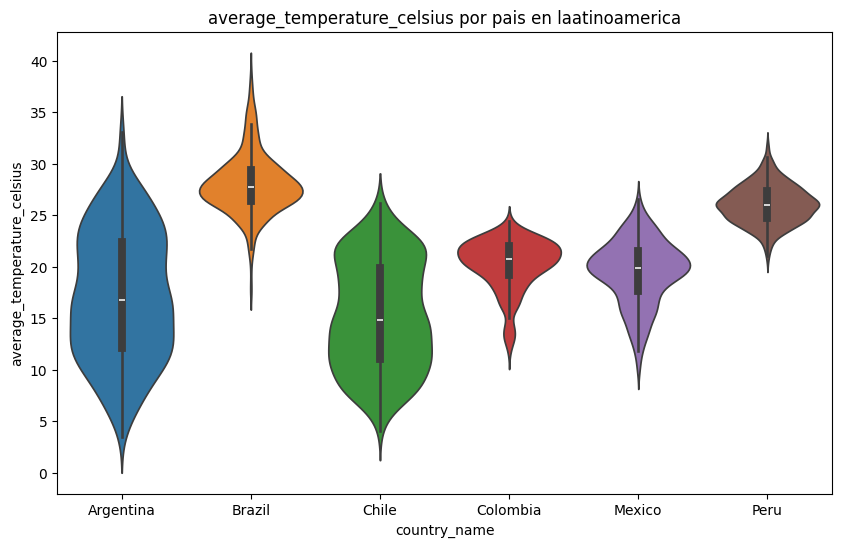

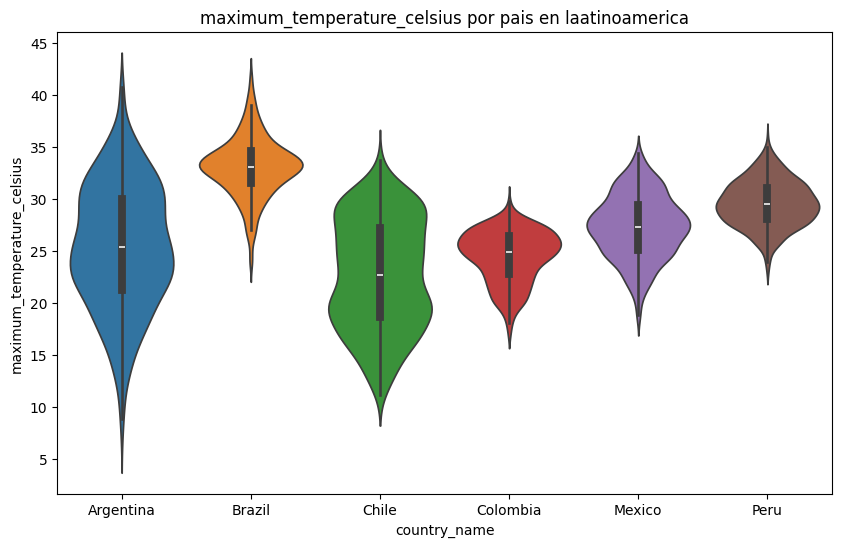

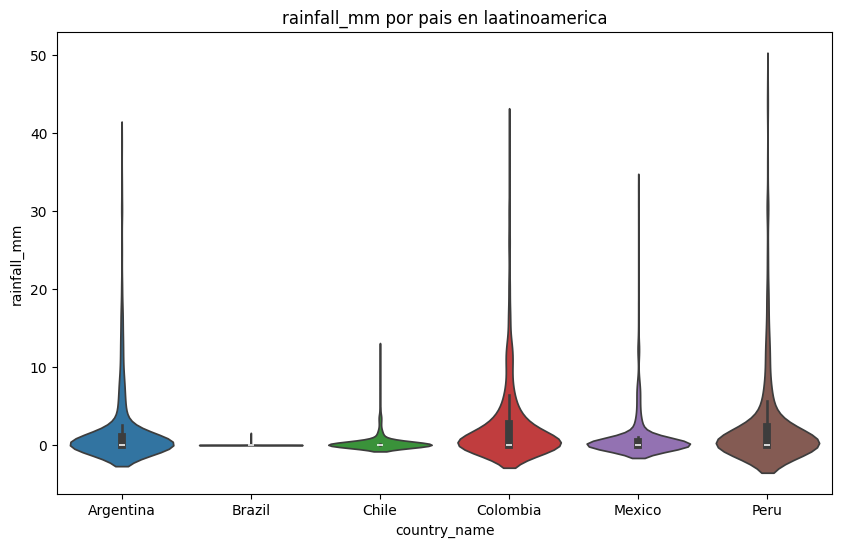

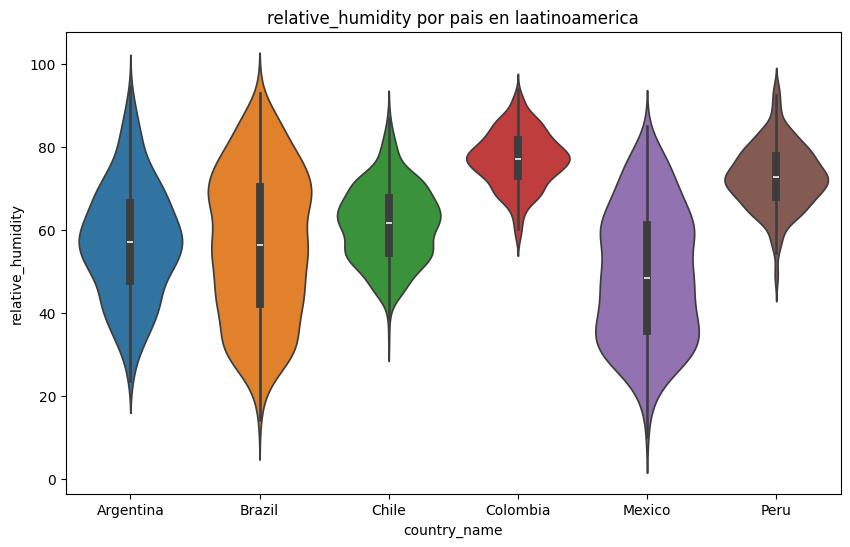

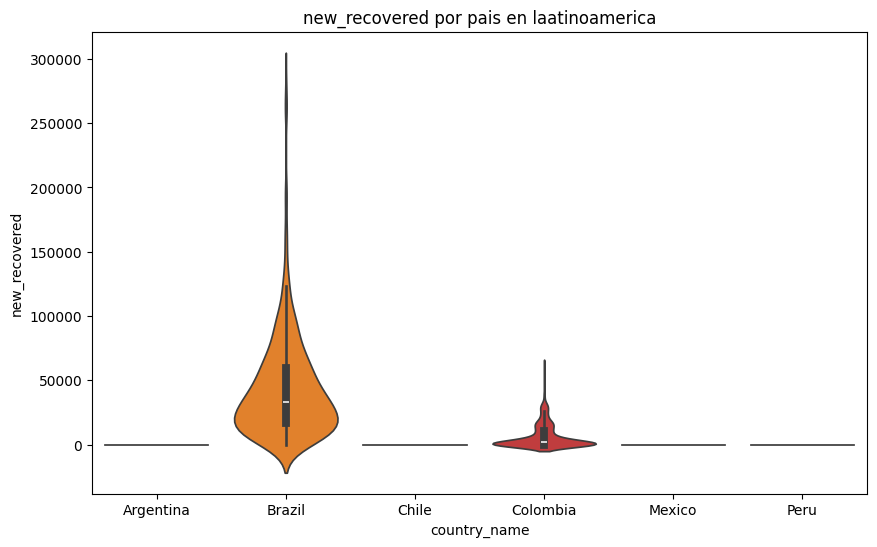

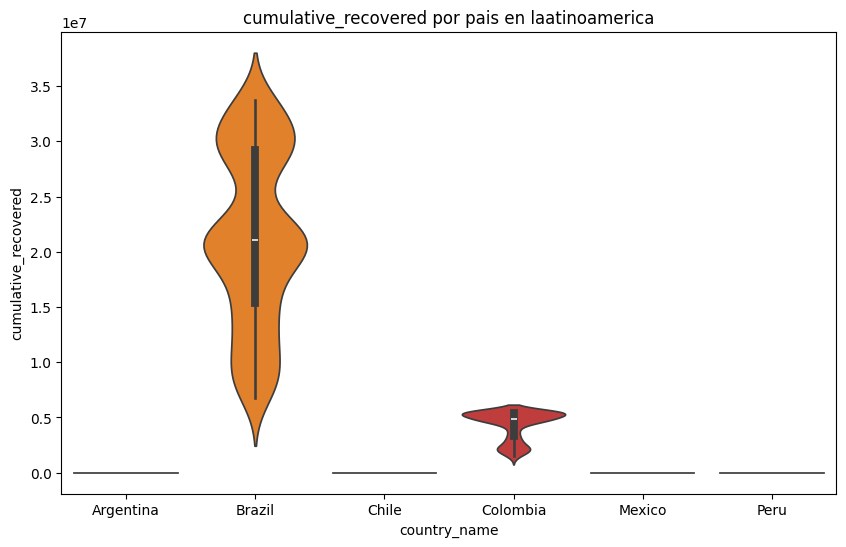

In [51]:
columnas_mayores_6=[]
for i in data_latam_paises.columns:
    if i not in ['location_key','date','country_code','latitude','longitude']:
        if data_latam_paises[i].nunique()>6:
            columnas_mayores_6.append(i)

columnas_mayores_6.append('country_name')

data_latam_paises_mayores_6=data_latam_paises[columnas_mayores_6]

for i in data_latam_paises_mayores_6.columns:
    if i not in ['location_key','date','country_code','latitude','longitude','country_name']:
        fig, ax = plt.subplots(figsize=(10,6))
        sns.violinplot(x='country_name', y=i, data=data_latam_paises_mayores_6, hue='country_name')
        plt.title(f'{i} por pais en laatinoamerica')
        plt.show()

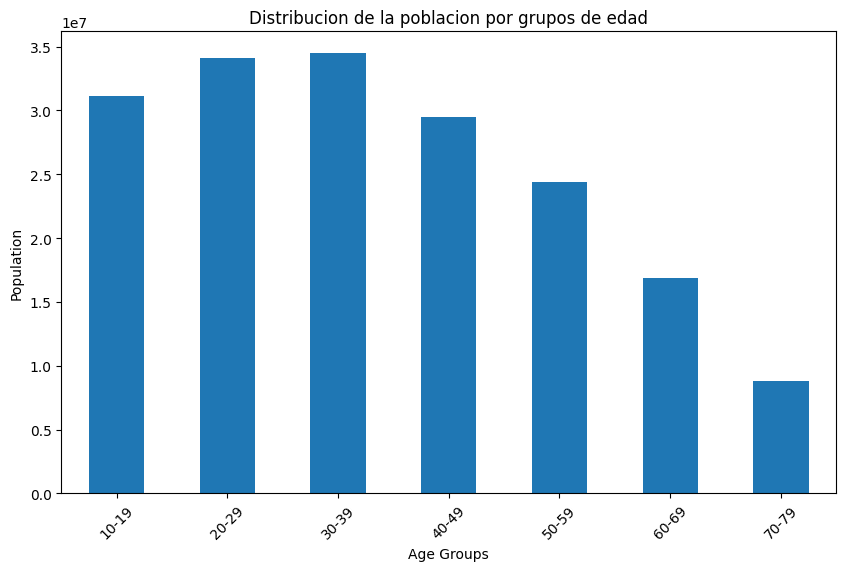

In [52]:
#distribucion de la poblacion por grupo de edad

age_columns =['population_age_10_19','population_age_20_29','population_age_30_39','population_age_40_49',
              'population_age_50_59','population_age_60_69','population_age_70_79']
age_distribution = data_latam_paises[age_columns].max()

plt.figure(figsize=(10,6))
age_distribution.plot(kind='bar',stacked=True)
plt.xlabel('Age Groups')
plt.ylabel('Population')
plt.title('Distribucion de la poblacion por grupos de edad')
plt.xticks(range(len(age_columns)),[col.split('_')[-2] + '-' + col.split('_')[-1] for col in age_columns], rotation=45)

plt.show()


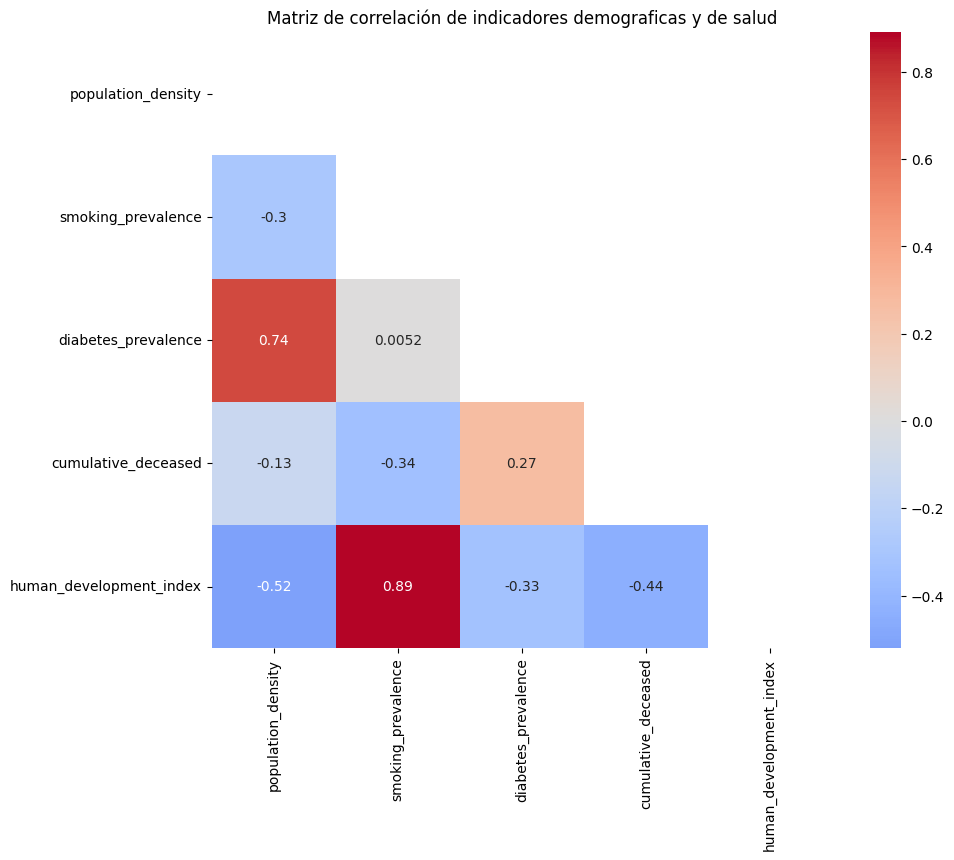

In [53]:
#Matriz de correlación de indicadores demográficos y de salud.
columns=['population_density', 'smoking_prevalence', 'diabetes_prevalence','cumulative_deceased','human_development_index']


correlacion_matriz=data_latam_paises[columns].corr()
mask= np.triu(np.ones_like(correlacion_matriz,dtype=bool))
plt.figure(figsize=(10,8))
sns.heatmap(correlacion_matriz, annot=True, mask=mask, cmap='coolwarm', center=0)
plt.title('Matriz de correlación de indicadores demograficas y de salud')
plt.show()

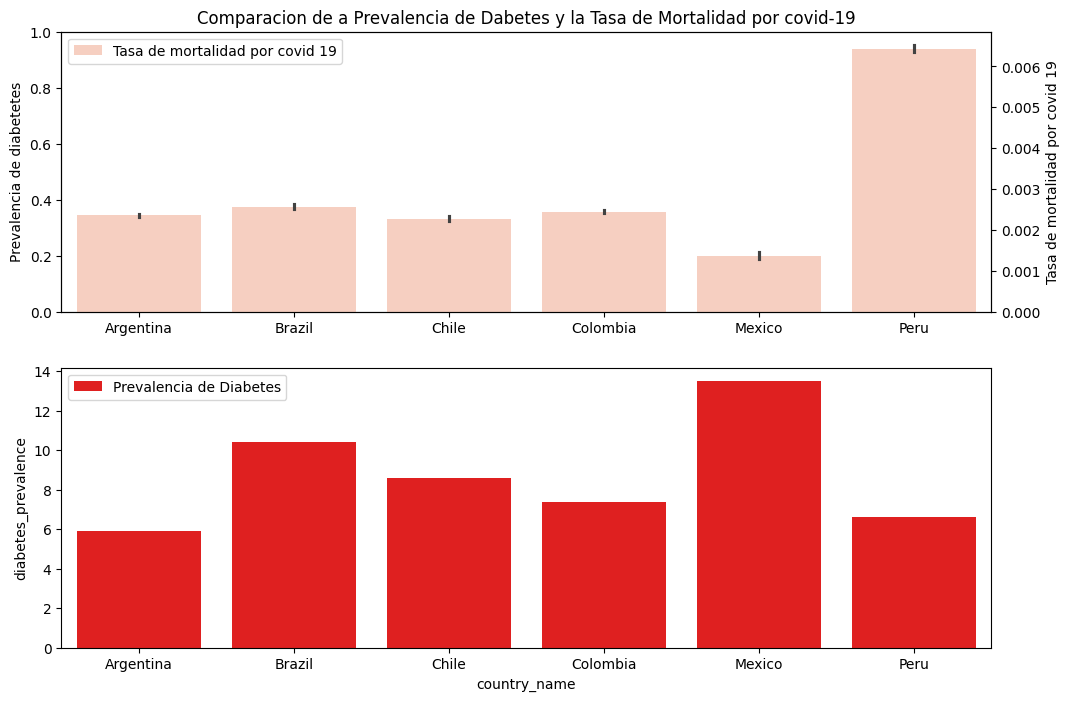

In [54]:
#Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad.
fig, (ax,ax2)= plt.subplots(2,1, figsize=(12,8))
sns.barplot(data=data_latam_paises, x=data_latam_paises['country_name'], y=data_latam_paises ['diabetes_prevalence'],color='red', label='Prevalencia de Diabetes') 
ax2=ax.twinx()
sns.barplot(data=data_latam_paises, x=data_latam_paises['country_name'], y=data_latam_paises['cumulative_deceased']/data_latam_paises['population'], color='coral',label='Tasa de mortalidad por covid 19', ax=ax2,
           alpha=0.4)
plt.xticks(rotation=90)
ax.set_ylabel('Prevalencia de diabetetes')
ax2.set_ylabel('Tasa de mortalidad por covid 19')
plt.title('Comparacion de a Prevalencia de Dabetes y la Tasa de Mortalidad por covid-19')
plt.show()




<function matplotlib.pyplot.show(close=None, block=None)>

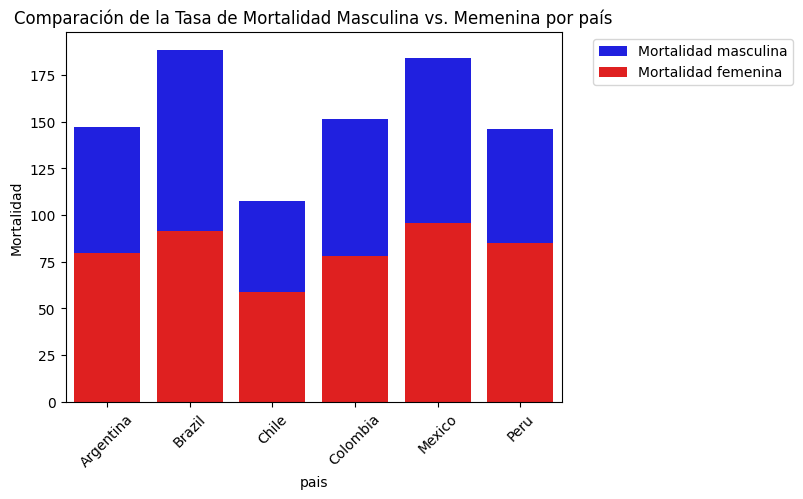

In [55]:
#Comparación de la Tasa de Mortalidad Masculina vs. Memenina por país.
sns.barplot(data=data_latam_paises, x='country_name', y='adult_male_mortality_rate', color='blue', label='Mortalidad masculina')
sns.barplot(data=data_latam_paises, x='country_name', y='adult_female_mortality_rate', color='red', label='Mortalidad femenina')
plt.xticks(rotation=45)
plt.xlabel("pais")
plt.ylabel('Mortalidad')
plt.title('Comparación de la Tasa de Mortalidad Masculina vs. Memenina por país')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show


## Avance 3

### Grafica evolucion semanal de casos nuevos de COVID-19 en latam

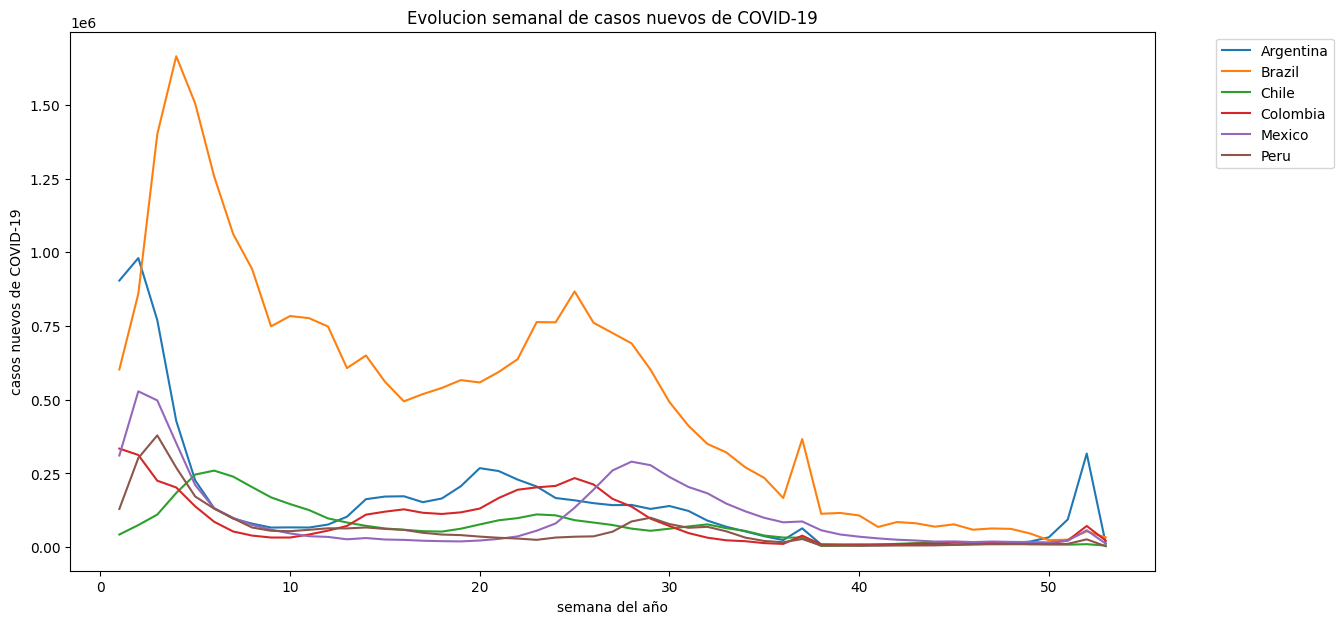

In [56]:
data_latam_paises["week"]=data_latam_paises.index.isocalendar().week
weekly_cases= data_latam_paises.groupby(["country_name","week"])["new_confirmed"].sum().reset_index()
plt.figure(figsize=(14,7))
for country in weekly_cases["country_name"].unique():
    country_weely_cases=weekly_cases[weekly_cases["country_name"]== country]
    plt.plot(country_weely_cases["week"], country_weely_cases["new_confirmed"], label=country)

plt.xlabel("semana del año")    
plt.ylabel("casos nuevos de COVID-19")
plt.title("Evolucion semanal de casos nuevos de COVID-19")
plt.legend(bbox_to_anchor=(1.05,1), loc= "upper left")
plt.show()

### Grafica evolucion anual de casos nuevos de COVID-19 en latam

In [57]:
data_latam_paises["month"]=data_latam_paises.index.month
yearly_cases= data_latam_paises.groupby(["country_name","month"])["new_confirmed"].sum().reset_index()
plt.figure(figsize=(14,7))
for country in yearly_cases["country_name"].unique():
    country_yearly_cases=yearly_cases[yearly_cases["country_name"]== country]
    plt.plot(country_yearly_cases["month"], country_yearly_cases["new_confirmed"], label=country)

plt.xlabel("month")    
plt.ylabel("casos nuevos de COVID-19")
plt.title("Evolucion anual de casos nuevos de COVID-19")
plt.legend(bbox_to_anchor=(1.05,1), loc= "upper left")
plt.show()

### Progreso de la vacunacion por pais

In [58]:

vaccination_data=data_latam_paises.groupby("country_name")["cumulative_vaccine_doses_administered"].max().sort_values(ascending=False)
#Agrupa los dato por nombre de pais y calcula el maximo de dosis de vacunas administradas acumuladas por pais y ordena los datos asendentemete
plt.figure(figsize=(12,8))# crea la figura
sns.barplot(x=vaccination_data.values, y= vaccination_data.index, hue= vaccination_data.index, palette= "viridis")
#Se genera un grafico de barras Los valores de las barras se toman de los valores de vaccination_data, mientras que los nombres de los países 
#se usan para etiquetar el eje y. La paleta de colores 'viridis' se utiliza para colorear las barras. El parámetro hue se establece en el 
# índice de vaccination_data, lo que significa que cada barra tendrá un color distinto según el país.
plt.xlabel("Dosis de vacunas administradas")#etiqueta del eje x
plt.ylabel("pais")#etiqueta del eje y
plt.title("progreso de la vacunacion por pais ") # titulo del grafico
plt.show() #mostrar grafico


### Grafico de la relacion entre la temperatura promedio y los nuevos casos de COVID-19 confirmados

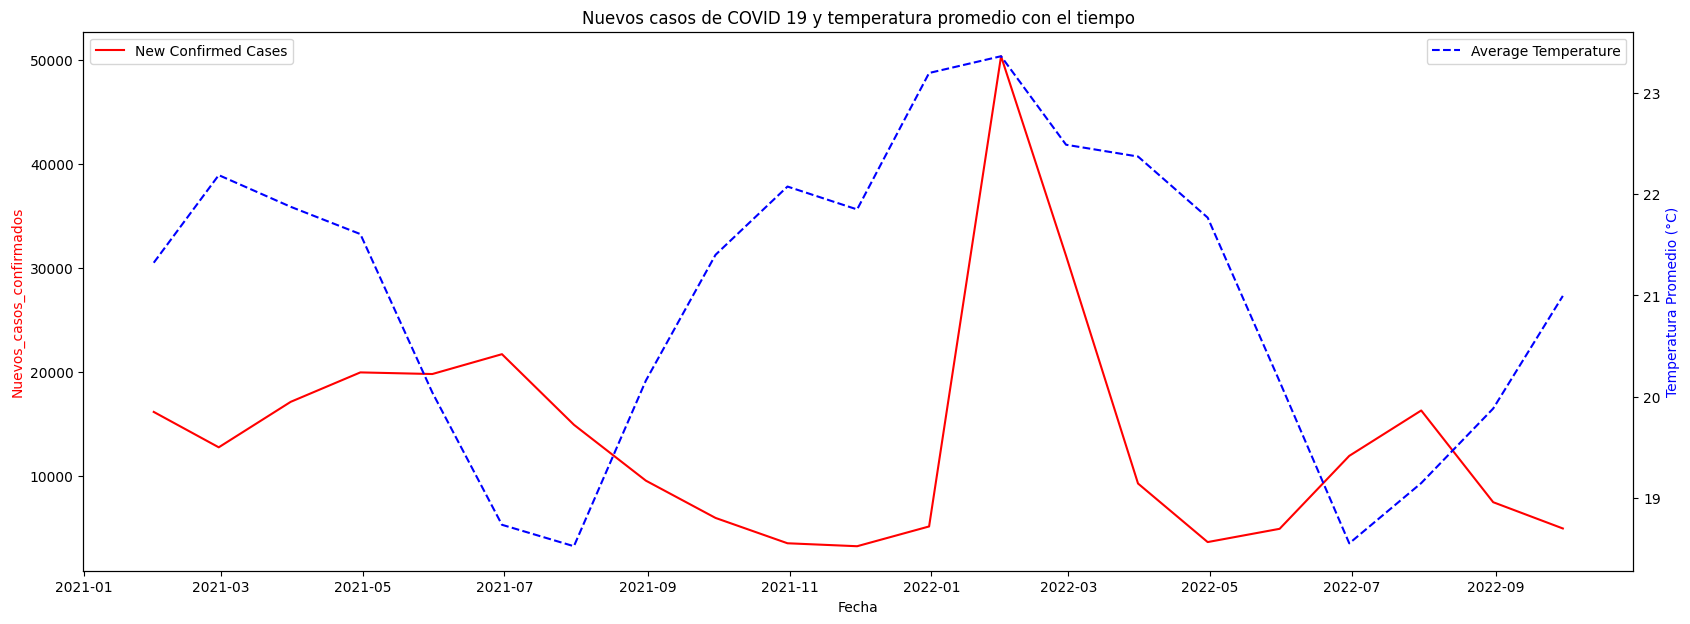

In [59]:
# Graficamos la relación entre la temperatura promedio y los nuevos casos confirmados de COVID-19

plt.figure(figsize=(20,7))# Se crea la figura
ax1 = plt.gca() # Se obtiene el eje actual ('ax1)
ax2 = ax1.twinx() # : Se crea un segundo eje y (ax2) que comparte el mismo eje x que ax1.
ax1.plot(data_latam_paises.resample('ME').mean(numeric_only=True).index, data_latam_paises.resample('ME').mean(numeric_only=True)['new_confirmed'],color='red', label='New Confirmed Cases')
#Se traza un gráfico de líneas en ax1 utilizando los datos de 'new_confirmed' (nuevos casos confirmados de COVID-19) en el eje y y las fechas en el eje x. Los datos se han re-muestreado a intervalos mensuales
# y se calcula la media para obtener valores mensuales. La línea se representa en color rojo y se le asigna una etiqueta 'New Confirmed Cases'.
ax2.plot(data_latam_paises.resample('ME').mean(numeric_only=True).index, data_latam_paises.resample('ME').mean(numeric_only=True)['average_temperature_celsius'],color='blue', label='Average Temperature', linestyle='--')
#Se traza otro gráfico de líneas en ax2 utilizando los datos de 'average_temperature_celsius' (temperatura promedio en grados Celsius) en el eje y y las fechas en el eje x. Los datos se han re-muestreado a intervalos mensuales y se 
#calcula la media. La línea se representa en color azul y se le asigna una etiqueta 'Average Temperature'. Además, se establece un estilo de línea discontinua (linestyle='--').
ax1.set_xlabel('Fecha')#Se establece la etiqueta del eje x para ax1.
ax1.set_ylabel('Nuevos_casos_confirmados', color='red')#Se establece la etiqueta del eje y para ax1. El texto de la etiqueta se colorea de rojo
ax2.set_ylabel('Temperatura Promedio (°C)', color='blue')#Se establece la etiqueta del eje y para ax2. El texto de la etiqueta se colorea de azul.
plt.title('Nuevos casos de COVID 19 y temperatura promedio con el tiempo')#Se establece el título del gráfico.
ax1.legend(loc='upper left')#Se agrega una leyenda al gráfico en ax1, ubicada en la esquina superior izquierda.
ax2.legend(loc='upper right')#Se agrega una leyenda al gráfico en ax2, ubicada en la esquina superior derecha.
plt.show() # Se muestra el gráfico.

 # 'resample()' se usa para cambiar la frecuencia de los datos de la serie de tiempo. 'ME': Este es el parámetro que se pasa a 
 #resample(), lo que indica que se desea remuestrear los datos a intervalos mensuales (M) y que se usará el final del mes (E) como el
 # punto de referencia para cada intervalo. Otras opciones comunes incluyen 'D' para días y 'A' para años.


C:\Users\paque\AppData\Local\Temp\ipykernel_2444\1368559015.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=urban_cases['urban_population_porcentage'], y=urban_cases.index, palette='viridis')


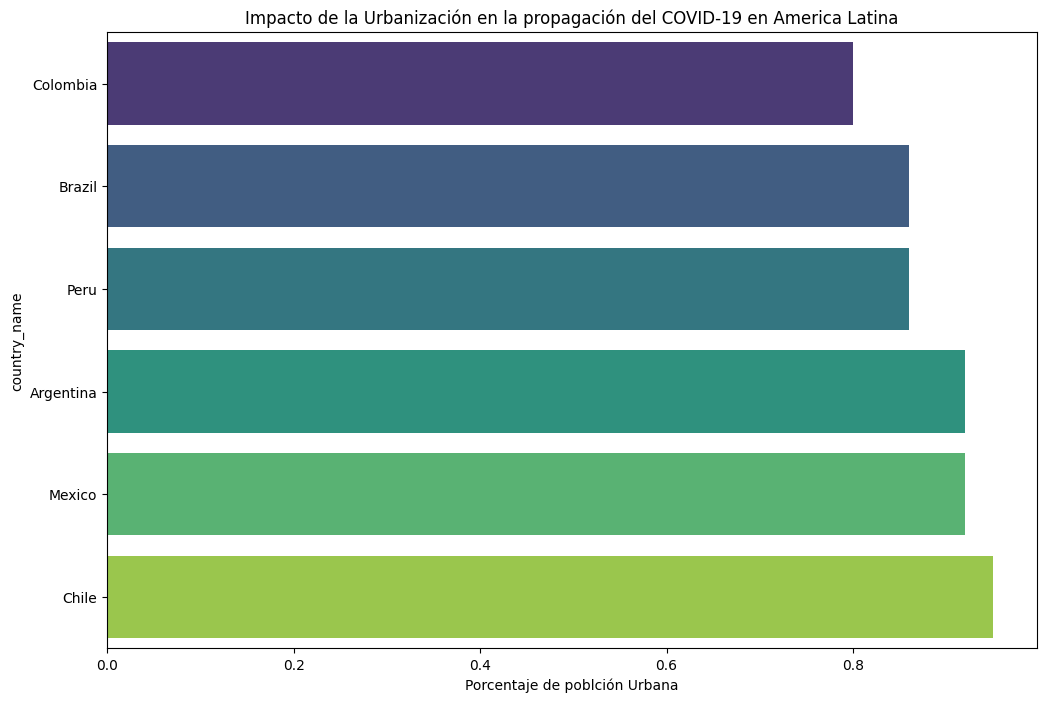

In [60]:
data_latam_paises['urban_population_porcentage']=(data_latam_paises['population_urban']/data_latam_paises['population']).round(2)
# Calcula el porcentaje de población urbana para cada país y se almacena en una nueva columna llamada 'urban_population_porcentage' en el dataframe 'data_latinoamerica_paises'
urban_cases = data_latam_paises.groupby('country_name').last().sort_values(by='urban_population_porcentage')
# Se agrupan los datos por país y se selecciona el ultimo valor de cada país utilizado 'last()' y ordena 
plt.figure(figsize=(12,8)) # Se crea figura para el gráfico
sns.barplot(x=urban_cases['urban_population_porcentage'], y=urban_cases.index, palette='viridis')
# muestra porcentaje de poblacion urbana y nombre de los paises con palette='viridis' se da color a cda barra
plt.xlabel('Porcentaje de poblción Urbana')#Etiqueta eje x
plt.title('Impacto de la Urbanización en la propagación del COVID-19 en America Latina')#Titulo del gráfico
plt.show()#Mostrar gráfico


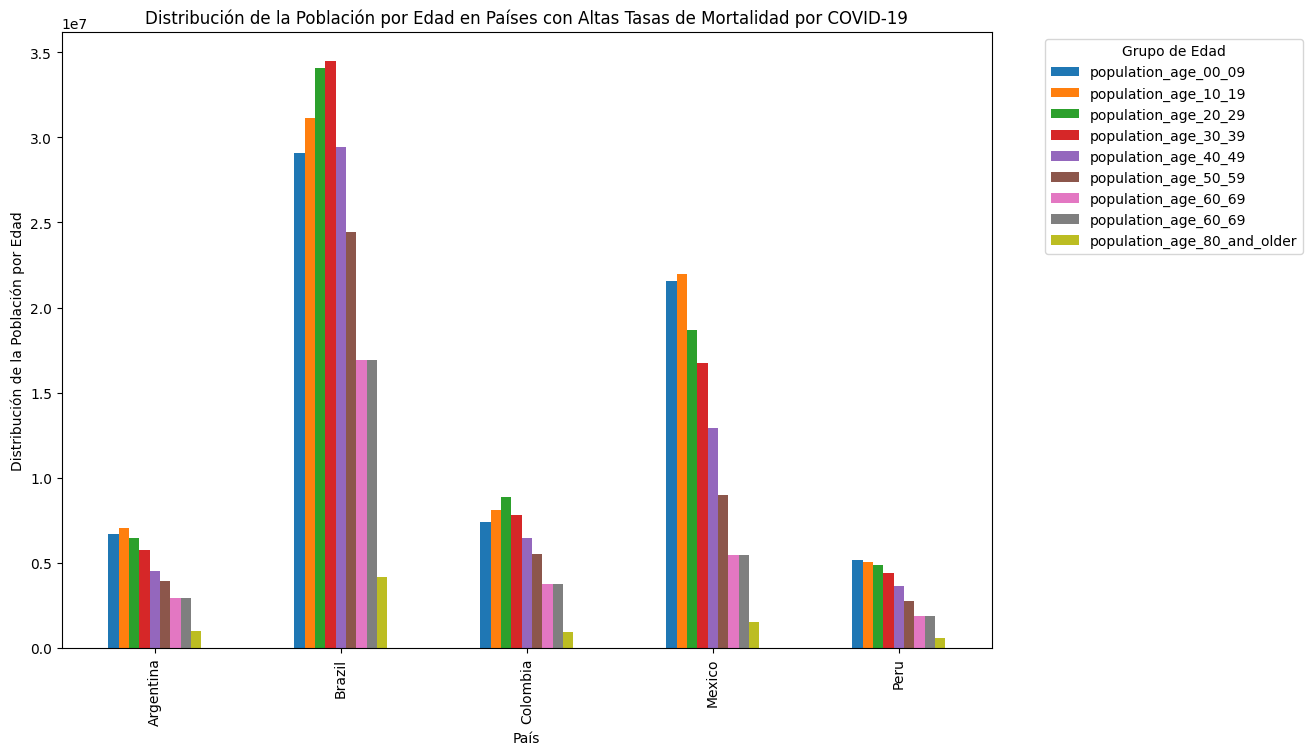

In [61]:
# Distribución de la Población por Edad en Países

high_mortality_countries = data_latam_paises.groupby('country_name') ['cumulative_deceased'].max().sort_values (ascending=False). head (5).index 
#Se identifican los paises con las 5 mayores tasas de mortalidad acumuladas en America Latina.  Se agrupan los datos por nombre de país y se selecciona el
# valor máximo de la columna 'cumulative_deceased' (defunciones acumuladas) para cada país. Luego, estos valores se ordenan en orden descendente y se 
#seleccionan los cinco primeros países. Finalmente, se obtienen los índices de estos países.
age_groups = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_60_69', 'population_age_80_and_older'] 
#Se define una lista de grupos de edad que se utilizarán para calcular la distribución de la población por edad en los países seleccionados.
age_distribution = data_latam_paises [data_latam_paises['country_name'].isin (high_mortality_countries)].groupby('country_name') [age_groups].mean()
#Se filtran los datos para incluir solo los países con altas tasas de mortalidad por COVID-19 utilizando el método isin() en la columna 'country_name'. Luego, se 
# agrupan los datos por nombre de país y se calcula la media de los grupos de edad para cada país.

age_distribution.plot(kind='bar', stacked=False, figsize=(12, 8))# Se traza un gráfico de barras para visualizar la distribución de la población por grupos
# de edad en los países seleccionados. La opción stacked=False indica que las barras no se apilarán una encima de la otra, sino que estarán una al lado de la otra
plt.xlabel('País')# Etiqueta eje x
plt.ylabel('Distribución de la Población por Edad')#Etiqueta eje y
plt.title('Distribución de la Población por Edad en Países con Altas Tasas de Mortalidad por COVID-19') #titulo
plt.legend (bbox_to_anchor= (1.05, 1), loc='upper left', title='Grupo de Edad')
#Se agrega una leyenda al gráfico, colocándola fuera del área del gráfico (bbox_to_anchor=(1.05, 1)), en la esquina superior izquierda
#  (loc='upper left'). Se especifica el título de la leyenda como 'Grupo de Edad'.
plt.show()#Muestra el gráfico



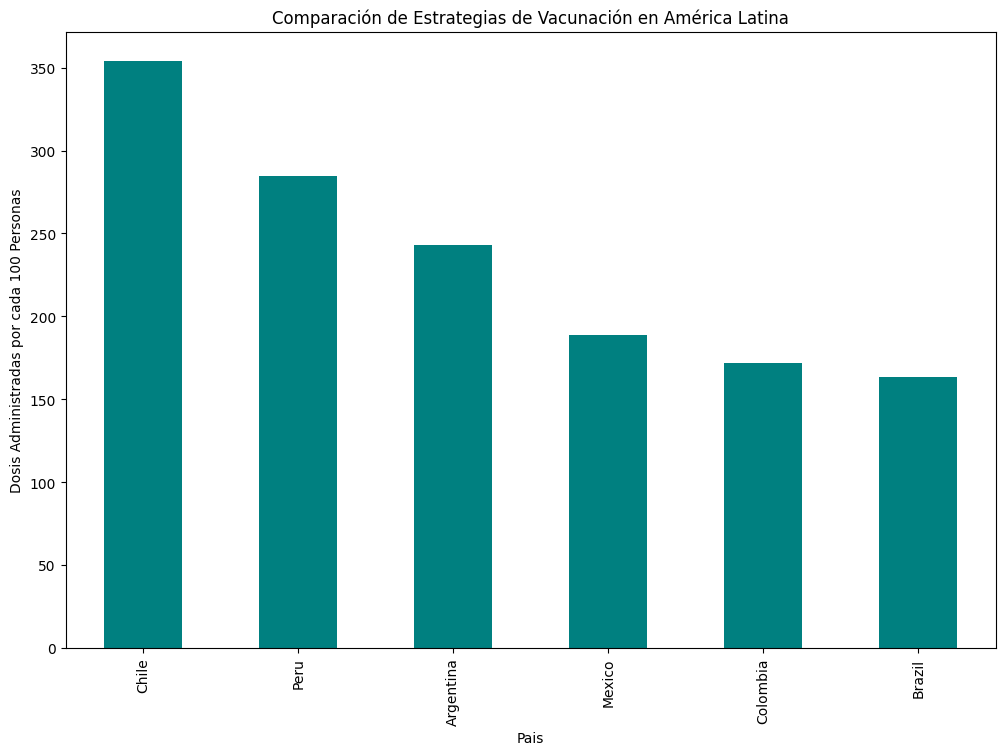

In [62]:
#Comparación de Estrategias de Vacunación en América Latina
vaccination_strategy = data_latam_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max() /data_latam_paises.groupby('country_name')['population'].max()*100 
#Se calcula la estrategia de vacunación para cada país dividiendo el número máximo de dosis de vacunas administradas acumuladas entre la población máxima del país, y luego multiplicando el resultado
# por 100 para obtener la cantidad de dosis administradas por cada 100 personas.
vaccination_strategy.sort_values (ascending=False). plot (kind='bar', figsize=(12, 8), color='teal') 
#Se traza un gráfico de barras utilizando los datos de la estrategia de vacunación. Los países se ordenan en función de su estrategia
#de vacunación de mayor a menor. El color de las barras se establece en 'teal'.
plt.xlabel('Pais')# Etiqueta del eje x
plt.ylabel('Dosis Administradas por cada 100 Personas') # Etiqueta del eje y
plt.title('Comparación de Estrategias de Vacunación en América Latina')#titulo
plt.show()#mostrar gráfico

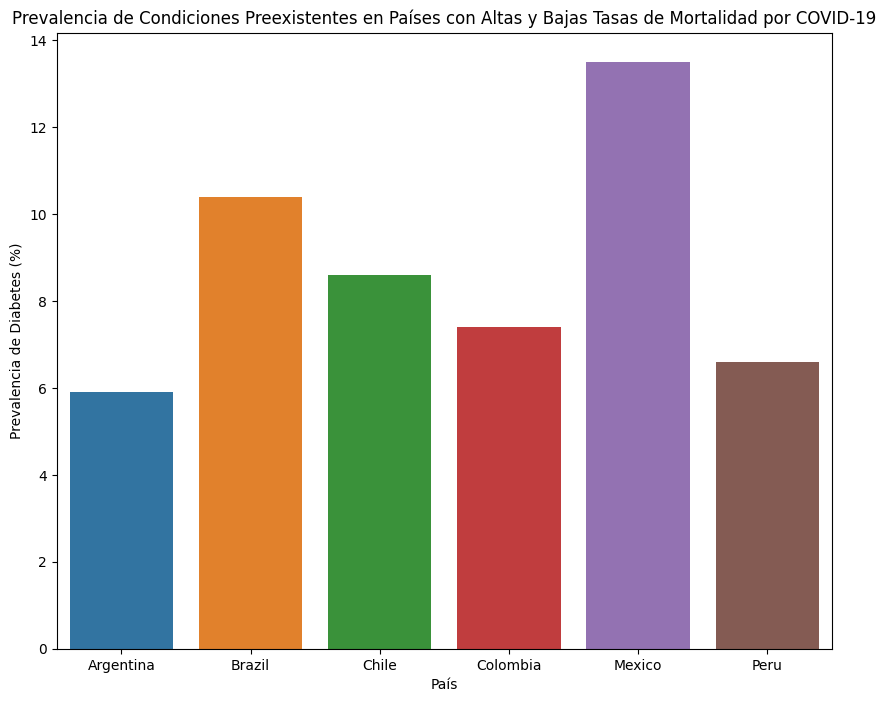

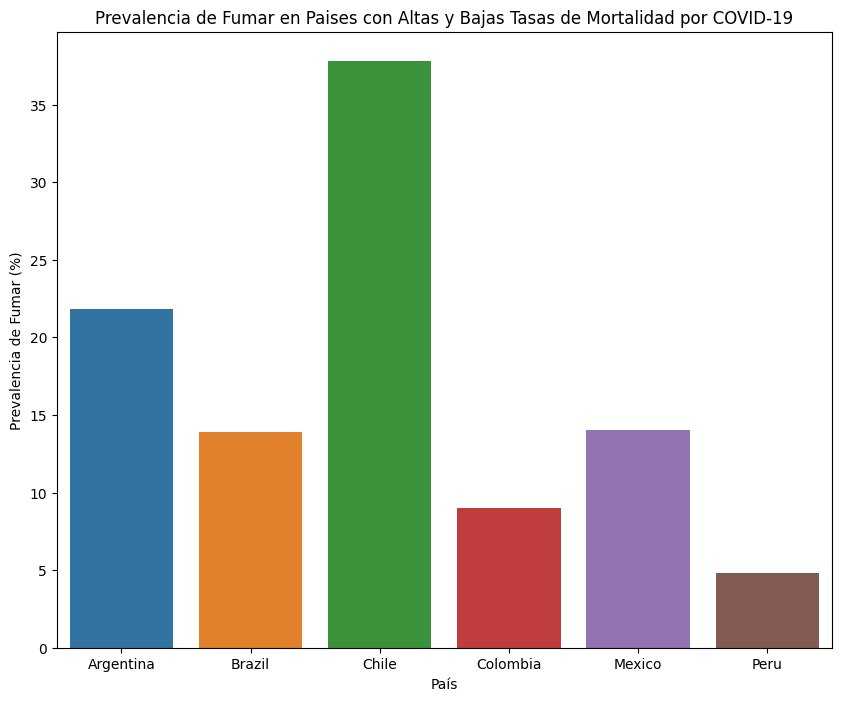

In [63]:
top_countries = data_latam_paises.groupby('country_name')['cumulative_deceased'].max().nlargest (5).index 
bottom_countries = data_latam_paises.groupby('country_name') ['cumulative_deceased'].max().nsmallest (5).index 
#Se seleccionan los cinco países con las mayores tasas de mortalidad acumulada por COVID-19 (top_countries) y los cinco 
# países con las menores tasas de mortalidad acumulada (bottom_countries). Esto se hace agrupando los datos por país, 
# calculando el máximo de defunciones acumuladas para cada país y luego seleccionando los cinco mayores y menores valores.
conditions_data = data_latam_paises [data_latam_paises['country_name'].isin(top_countries.union (bottom_countries))] 
#Se filtran los datos para incluir solo los países con las mayores y menores tasas de mortalidad acumulada por COVID-19. Esto se hace
# utilizando el método isin() en la columna 'country_name' y pasando la unión de los conjuntos de países con mayores y menores
#  tasas de mortalidad.
plt.figure(figsize=(10, 8)) #Se crea la figura
sns.barplot(data=conditions_data, x='country_name', y='diabetes_prevalence', hue='country_name')# Trazo de gráfico de barras
plt.xlabel('País') # etiqueta eje x
plt.ylabel('Prevalencia de Diabetes (%)') # # etiqueta eje x
plt.title('Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad por COVID-19')# etiqueta titulo
plt.show() #Mostrar grafico
# Prevalencia de fumar.
plt.figure(figsize=(10, 8))
sns.barplot(data=conditions_data, x='country_name', y='smoking_prevalence', hue='country_name')
plt.xlabel('País')
plt.ylabel('Prevalencia de Fumar (%)')
plt.title('Prevalencia de Fumar en Paises con Altas y Bajas Tasas de Mortalidad por COVID-19')
plt.show()


### Grafico Tasa de letalidad del COVID-19

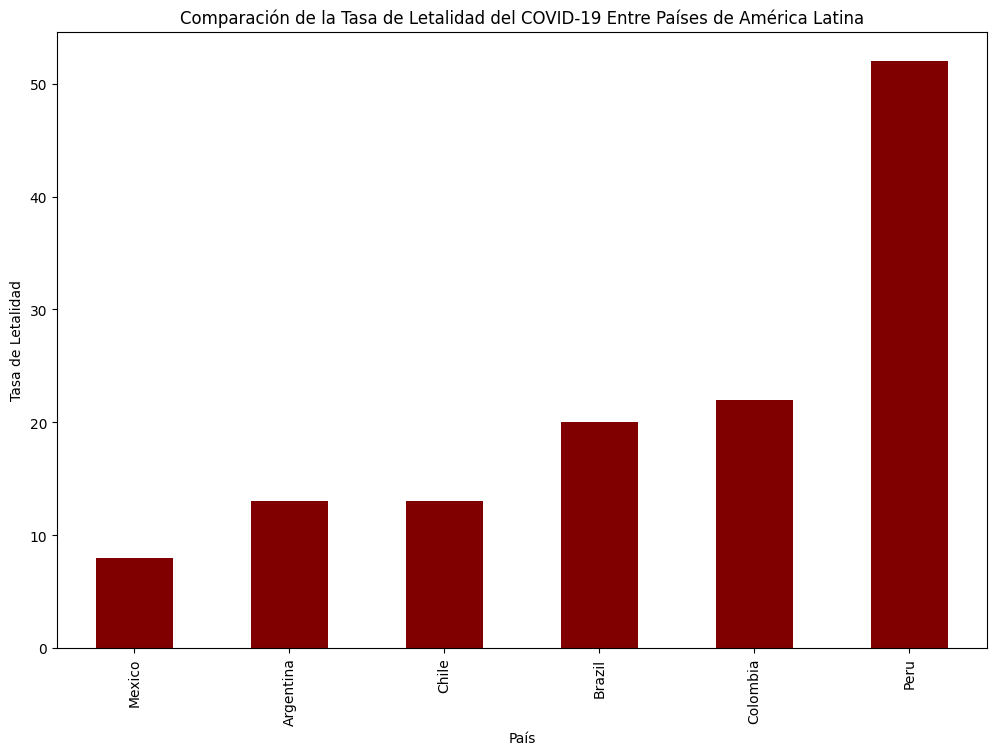

In [64]:
data_latam_paises ['case_fatality_rate'] = ((data_latam_paises['cumulative_deceased']/data_latam_paises['cumulative_confirmed'])*1000).round(0)
#Se calcula la tasa de letalidad del COVID-19 para cada país dividiendo el número acumulado de fallecimientos entre el número acumulado de casos 
#confirmados. Esta tasa se almacena en una nueva columna llamada 'case_fatality_rate' en el DataFrame data_latinoamerica_paises
fatality_rates = data_latam_paises.groupby('country_name') ['case_fatality_rate'].last().sort_values()
#Se agrupan los datos por país y se selecciona el último valor de la tasa de letalidad para cada país. Luego, los 
#datos se ordenan en orden ascendente según la tasa de letalidad. last() selecciona el ultimo valor de la tasa
#sort_values() ordena la columna 'case_fatality_rate'
plt.figure(figsize=(12, 8))# Se crea la figura
fatality_rates.plot(kind='bar', color='maroon') #Trazo de grafico de barras
plt.xlabel('País')
plt.ylabel('Tasa de Letalidad')
plt.title('Comparación de la Tasa de Letalidad del COVID-19 Entre Países de América Latina')
plt.show()


### Relacion entre cobertura de vacunacion y la reduccion de casos de COVID-19

C:\Users\paque\AppData\Local\Temp\ipykernel_2444\2474995824.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_latam_paises.resample('M').mean(numeric_only=True)['new_confirmed'].plot(ax=ax1, color='blue', label='Casos Nuevos')
C:\Users\paque\AppData\Local\Temp\ipykernel_2444\2474995824.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_latam_paises.resample('M').mean(numeric_only=True)['percentage vaccinated'].plot(ax=ax2, color='green', label='Porcentaje de la Población Vacunada')


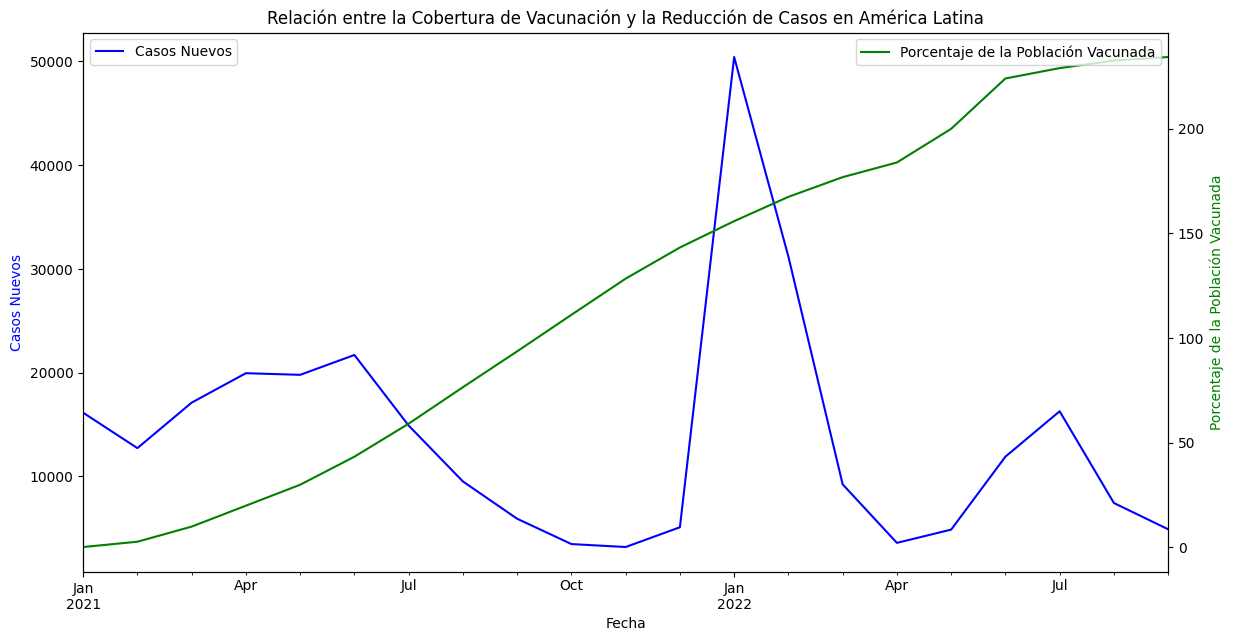

In [65]:
# Como evoluciona la vacunación en América Latina y la reducción de casos de COVID-19
plt.figure(figsize=(14, 7))# Se genera el gráfico 
ax1 = plt.gca()# Se asigna el primer eje como eje principal
ax2 = ax1.twinx()# Se cra un segundo eje que comparte el mismo eje x

#crea porcentajes de vacunacion
data_latam_paises['percentage vaccinated'] = data_latam_paises['cumulative_vaccine_doses_administered'] /data_latam_paises['population']*100 
#  Se agrupan los datos por mes (resample('M')) y se calcula la media de las variables numéricas (mean(numeric_only=True)).
data_latam_paises.resample('M').mean(numeric_only=True)['new_confirmed'].plot(ax=ax1, color='blue', label='Casos Nuevos')
data_latam_paises.resample('M').mean(numeric_only=True)['percentage vaccinated'].plot(ax=ax2, color='green', label='Porcentaje de la Población Vacunada')   

ax1.set_xlabel('Fecha')
ax1.set_ylabel('Casos Nuevos', color='blue')
ax2.set_ylabel('Porcentaje de la Población Vacunada', color='green')
ax1.set_title('Relación entre la Cobertura de Vacunación y la Reducción de Casos en América Latina')
ax1.legend (loc='upper left')
ax2.legend (loc='upper right') 
plt.show()





### Analisis temporal de la mortalidad

In [73]:
# cómo evolucionó la mortalidad
data_latam_paises['mortality_rate'] =(data_latam_paises ['cumulative_deceased'] /data_latam_paises['cumulative_confirmed'])*100
# Calcula la tasa de mortalidad dividiendo el número acumulado de fallecidos entre el número acumulado de casos confirmados de COVID-19 en América Latina.
#  El resultado se almacena en una nueva columna llamada 'mortality_rate' en el DataFrame data_latinoamerica_paises.
plt.figure(figsize=(14, 7)) #Crea la figura
sns.lineplot(data=data_latam_paises, x='date', y='mortality_rate', estimator='mean', ci=None)
#Traza un gráfico de lineas con la columna 'date' y la columna 'mortaly_rate' , el parametro estimator='mean' calcula la media de los
#valores en cada periodo del tiempo y ci=None evita que se muestren intervalos de confianza en el gráfico.
plt.title('Análisis Temporal de la Mortalidad por COVID-19 en América Latina')# Titulo del Gráfico
plt.xlabel('Fecha')#Etiquta del eje x
plt.ylabel('Tasa de Mortalidad')#Etiqueta del eje y
plt.show()#mostrar el grafico



C:\Users\paque\AppData\Local\Temp\ipykernel_2444\3427749739.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data_latam_paises, x='date', y='mortality_rate', estimator='mean', ci=None)


### Evolucion de casos activos vs recuperados

C:\Users\paque\AppData\Local\Temp\ipykernel_2444\3434409216.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sns.lineplot(data=data_latam_paises.resample('M').mean(numeric_only=True), x='date', y='active_cases', label='Casos Activos')
C:\Users\paque\AppData\Local\Temp\ipykernel_2444\3434409216.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sns.lineplot(data=data_latam_paises.resample('M').mean(numeric_only=True), x='date', y='cumulative_recovered', label='Casos Recuperados')


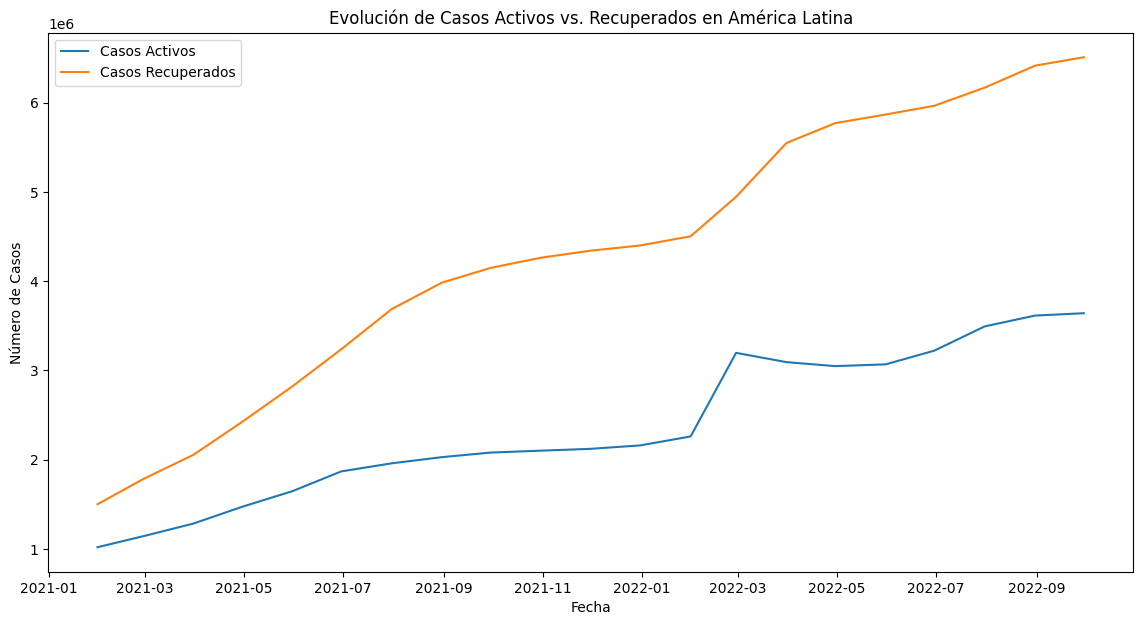

In [67]:
#como evolucionan los casos activos y recuperados en América Latina
data_latam_paises['active_cases'] = data_latam_paises['cumulative_confirmed'] - data_latam_paises['cumulative_deceased'] - data_latam_paises['cumulative_recovered']
# : Se calcula el número de casos activos restando el total de casos confirmados por COVID-19 de la suma de los fallecidos y los recuperados. Esto se realiza mediante la fórmula:
plt.figure(figsize=(14, 7)) # Crea figura
sns.lineplot(data=data_latam_paises.resample('M').mean(numeric_only=True), x='date', y='active_cases', label='Casos Activos')
#Se utiliza el método sns.lineplot() para trazar la media mensual de los casos activos (active_cases) en el eje y, y la fecha (date) en el eje x.
sns.lineplot(data=data_latam_paises.resample('M').mean(numeric_only=True), x='date', y='cumulative_recovered', label='Casos Recuperados')
#Se utiliza nuevamente el método sns.lineplot() para trazar la media mensual de los casos recuperados (cumulative_recovered) en el eje 
plt.xlabel('Fecha') 
plt.ylabel('Número de Casos')
plt.title('Evolución de Casos Activos vs. Recuperados en América Latina')
plt.legend()#Agrega leyenda en el gráfico 
plt.show()





### Comparacion de la situacion actual ( contexto de los datos)

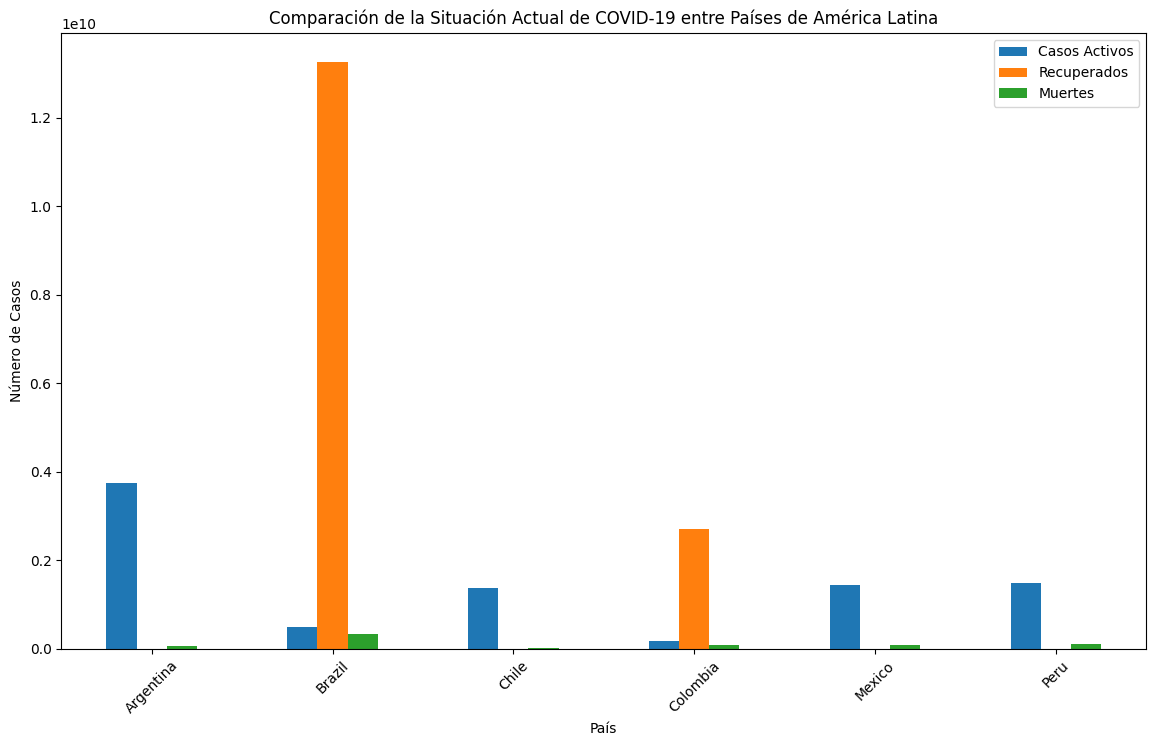

In [68]:
#No se tienen dato pero hay datos de recuperados y muertes en algunos paises
current_situation = data_latam_paises.groupby('country_name').sum()[['active_cases', 'cumulative_recovered', 'cumulative_deceased']] 
# Agrupa por el nombre del pais , calcula la suma de las columnas 'active_cases', 'cumulative_recovered', 'cumulative_deceased' par cada país
# Se crea un nuevo dataframe current_situation con los totales de casos activos, recuperados y fallecidos para cada país.
current_situation.plot(kind='bar', stacked=False, figsize=(14, 8))#utiliza el metodo plot() del dataframe para generar gráfico de barras
#stacked significa que no se apilaran las barras (cada gráfica representa una cantidad independiente, no una acumulación)
plt.title('Comparación de la Situación Actual de COVID-19 entre Países de América Latina')
plt.xlabel('País')
plt.ylabel('Número de Casos')
plt.legend (['Casos Activos', 'Recuperados', 'Muertes'])
plt.xticks(rotation=45)
plt.show()

### Mapa

In [69]:
import folium
import geopandas as gpd
from folium.plugins import HeatMap

# Cargar los datos geoespaciales de los países en América Latina
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filtrar los países de América Latina
latam_countries = world[(world['continent'] == 'South America') | (world['continent'] == 'Central America')]

# Se definen las columnas de interés que se utilizarán para crear el mapa. 
# Estas columnas incluyen la latitud, longitud y datos acumulados de casos confirmados, fallecidos,
# dosis de vacunas administradas y recuperados.
columns = ['latitude', 'longitude', 'cumulative_confirmed', 'cumulative_deceased', 
           'cumulative_vaccine_doses_administered', 'cumulative_recovered'] 

# Se crea un nuevo DataFrame llamado data_map, que contiene solo las filas de data_latinoamerica_paises 
# que no tienen valores nulos en las columnas especificadas.
data_map = data_latam_paises[columns].dropna()

# Crear un mapa base con GeoPandas
latam_map = folium.Map(location=[-14.235004, -51.92528], zoom_start=3)

# Iterar sobre los países y agregar cada uno al mapa base
for idx, row in latam_countries.iterrows():
    # Agregar un borde para cada país
    folium.GeoJson(row['geometry'], 
                   name=row['name'],
                   tooltip=row['name']).add_to(latam_map)

# Agregar mapas de calor para los casos confirmados, fallecidos, dosis de vacunas administradas y recuperados
heat_map_confirmed = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_confirmed']], radius=15)
latam_map.add_child(heat_map_confirmed)

heat_map_deceased = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_deceased']], radius=15) 
latam_map.add_child(heat_map_deceased)

heat_map_vaccine = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_vaccine_doses_administered']], radius=15) 
latam_map.add_child(heat_map_vaccine)

heat_map_recovered = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_recovered']], radius=15) 
latam_map.add_child(heat_map_recovered)

# Guardar el mapa como un archivo HTML llamado "mapa_con_informacion.html"
latam_map.save('mapa_con_informacion.html')

# Mostrar el mapa
latam_map


C:\Users\paque\AppData\Local\Temp\ipykernel_2444\4282782504.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [74]:
data_latam_paises.reset_index(inplace=True)

In [75]:
path_nuevo_csv = 'DatosFinales.csv'

data_latam_paises.to_csv(path_nuevo_csv, index=False)


In [76]:
data = pd.read_csv('DatosFinales.csv')